<a href="https://colab.research.google.com/github/NeginMirian/Rag-implementation/blob/main/Forecasting_with_RF_lastversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import csv

pd.set_option('display.expand_frame_repr', False)

In [ ]:
# Data processing
# ==============================================================================
import numpy as np
import pandas as pd

from datetime import date
import holidays

import datetime
from datetime import datetime

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import plotly.express as px
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline

import matplotlib.dates as md
from matplotlib.dates import DayLocator, HourLocator,DateFormatter

import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('fivethirtyeight')

# Modelling and Forecasting
# ==============================================================================
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

from joblib import dump, load

# Configuration
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')
%config Completer.use_jedi = False

C:\Users\antonio.liguori\AppData\Roaming\Python\Python39\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex
C:\Users\antonio.liguori\.conda\envs\ML\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [ ]:
                                                                  ##PRE-PROCESSING##

In [ ]:
df= pd.read_csv('datasetLSTM2018_2019.csv', usecols=['TIMESTAMP','LEGCODE','OCCUPIED_SPACE_PERCENTAGE'])
print(df)

               TIMESTAMP      LEGCODE  OCCUPIED_SPACE_PERCENTAGE
0       01/01/2018 00:00  DEPUT-DKROF                      0.035
1       01/01/2018 01:00  DEPUT-DKROF                      0.093
2       01/01/2018 02:00  DEPUT-DKROF                      0.089
3       01/01/2018 03:00  DEPUT-DKROF                      0.067
4       01/01/2018 04:00  DEPUT-DKROF                      0.067
...                  ...          ...                        ...
122716  31/12/2019 19:45  SEHEL-DKHLS                      0.068
122717  31/12/2019 20:45  SEHEL-DKHLS                      0.090
122718  31/12/2019 21:45  SEHEL-DKHLS                      0.091
122719  31/12/2019 22:45  SEHEL-DKHLS                      0.045
122720  31/12/2019 23:45  SEHEL-DKHLS                      0.053

[122721 rows x 3 columns]


In [ ]:
df.min(), df.max()

(TIMESTAMP                    01/01/2018 00:00
 LEGCODE                           DEPUT-DKROF
 OCCUPIED_SPACE_PERCENTAGE                 0.0
 dtype: object,
 TIMESTAMP                    31/12/2019 23:45
 LEGCODE                           SEHEL-DKHLS
 OCCUPIED_SPACE_PERCENTAGE               1.375
 dtype: object)

In [ ]:
df['TIMESTAMP']= pd.to_datetime(df['TIMESTAMP'])

In [ ]:
df.OCCUPIED_SPACE_PERCENTAGE = df.OCCUPIED_SPACE_PERCENTAGE.astype(float)

In [ ]:
                                        ##FILTER DATASET

In [ ]:
#df = df[(df['TIMESTAMP'] > '2018-01-01') & (df['TIMESTAMP'] < '2019-01-01')]
#df = df[(df['TIMESTAMP'] > '2019-01-01') & (df['TIMESTAMP'] <= '2019-12-31')]

In [ ]:
df.min(), df.max()

(TIMESTAMP                    2018-01-01 00:00:00
 LEGCODE                              DEPUT-DKROF
 OCCUPIED_SPACE_PERCENTAGE                    0.0
 dtype: object,
 TIMESTAMP                    2019-12-31 23:45:00
 LEGCODE                              SEHEL-DKHLS
 OCCUPIED_SPACE_PERCENTAGE                  1.375
 dtype: object)

In [ ]:
df = df[(df['LEGCODE']== "DEPUT-DKROF") ]

In [ ]:
df=df.drop(['LEGCODE'],axis=1)

In [ ]:
df.sort_values(by = 'TIMESTAMP' )

TIMESTAMP  OCCUPIED_SPACE_PERCENTAGE
0     2018-01-01 00:00:00                      0.035
1     2018-01-01 01:00:00                      0.093
2     2018-01-01 02:00:00                      0.089
3     2018-01-01 03:00:00                      0.067
4     2018-01-01 04:00:00                      0.067
...                   ...                        ...
36928 2019-12-31 19:00:00                      0.300
36929 2019-12-31 20:00:00                      0.246
36930 2019-12-31 21:00:00                      0.225
36931 2019-12-31 22:00:00                      0.101
36932 2019-12-31 23:00:00                      0.251

[36933 rows x 2 columns]

In [ ]:
##CHECK FOR NA VALUES
df.isna().sum()

TIMESTAMP                    0
OCCUPIED_SPACE_PERCENTAGE    0
dtype: int64

In [ ]:
#check for NA values

#df = df[df['CONSUMED_GDS'].notna()]
#df.isna().sum()

In [ ]:
#se ci sono NA su alcune partenze, interpolare i valori con il metodo lineare

#df.interpolate(method='linear')

In [ ]:
#check for consistency of OCCUPIED_SPACE_PERCENTAGE
(df.OCCUPIED_SPACE_PERCENTAGE >1).sum()

4

In [ ]:
#replace values more then 1 with 1
df.loc[df['OCCUPIED_SPACE_PERCENTAGE'] > 1, 'OCCUPIED_SPACE_PERCENTAGE'] = 1
df
(df.OCCUPIED_SPACE_PERCENTAGE >1).sum()

#in alternative drop the rows
#df = df.drop(df[(df.PERCENTCONSUMED_GDS >1)].index)

0

In [ ]:
#moreOne = df.loc[df['OCCUPIED_SPACE_PERCENTAGE'] > 1.0]

In [ ]:
#Calculate the number of days before departures

#df['DAYSBEFOREDEPARTURE'] = (df['DEPARTUREDATE'] - df['STARTDATE']).dt.days
#df.head()

#df=df.drop(['STARTDATE'],axis=1)
#df

In [ ]:
#Calculate percentage of consumed GDS

#df_filtered.CONSUMED_GDS = df_filtered.CONSUMED_GDS.astype(int)
#df['CONSUMED_GDS'] = pd.to_numeric(df['CONSUMED_GDS'])

#df['PERCENTCONSUMED_GDS'] = df.CONSUMED_GDS / df.TOTALCAPACITY_GDS
#df

#df=df.drop(['CONSUMED_GDS',	'TOTALCAPACITY_GDS'],axis=1)

In [ ]:
df = df.rename(columns={'TIMESTAMP': 'DEPARTUREDATE'})

In [ ]:
##GROUP BY HOUR OF DEPARTURE DATE
df['DEPARTUREDATETIME_HOUR'] = df.DEPARTUREDATE.dt.round('H')
df['TIME'] = df.DEPARTUREDATETIME_HOUR.dt.time

In [ ]:
df = df.groupby(
    ['DEPARTUREDATETIME_HOUR']
     #,'DAYSBEFOREDEPARTURE']
).agg(
    {
    #'CONSUMED_GDS':"sum",
    #'PERCENTCONSUMED_GDS':"sum"
     'OCCUPIED_SPACE_PERCENTAGE':"mean"
        }
).reset_index()

df

DEPARTUREDATETIME_HOUR  OCCUPIED_SPACE_PERCENTAGE
0        2018-01-01 00:00:00                      0.035
1        2018-01-01 01:00:00                      0.093
2        2018-01-01 02:00:00                      0.089
3        2018-01-01 03:00:00                      0.067
4        2018-01-01 04:00:00                      0.067
...                      ...                        ...
17512    2019-12-31 19:00:00                      0.300
17513    2019-12-31 20:00:00                      0.246
17514    2019-12-31 21:00:00                      0.225
17515    2019-12-31 22:00:00                      0.101
17516    2019-12-31 23:00:00                      0.251

[17517 rows x 2 columns]

In [ ]:
df = df.rename(columns={'DEPARTUREDATETIME_HOUR': 'DEPARTUREDATE'})

In [ ]:
df.isna().sum()

DEPARTUREDATE                0
OCCUPIED_SPACE_PERCENTAGE    0
dtype: int64

In [ ]:
                                              ##modify EXOGEN variables

In [ ]:
##ADD NEW COLUMN FROM DEPARTUREDATE

In [ ]:
#IS HOLIDAY

fi_holidays = holidays.CountryHoliday('FI')

date_holidays = holidays.FI(state='FI', years=(2018,2019)).keys()
date_holidays_list = list(date_holidays)

df['DATE'] = pd.to_datetime(df['DEPARTUREDATE']).dt.date
df['IS_HOLIDAY'] = df.DATE.isin(date_holidays_list)
df = df.drop(['DATE'], axis=1)
df.IS_HOLIDAY = df.IS_HOLIDAY.astype(int)

df

DEPARTUREDATE  OCCUPIED_SPACE_PERCENTAGE  IS_HOLIDAY
0     2018-01-01 00:00:00                      0.035           1
1     2018-01-01 01:00:00                      0.093           1
2     2018-01-01 02:00:00                      0.089           1
3     2018-01-01 03:00:00                      0.067           1
4     2018-01-01 04:00:00                      0.067           1
...                   ...                        ...         ...
17512 2019-12-31 19:00:00                      0.300           0
17513 2019-12-31 20:00:00                      0.246           0
17514 2019-12-31 21:00:00                      0.225           0
17515 2019-12-31 22:00:00                      0.101           0
17516 2019-12-31 23:00:00                      0.251           0

[17517 rows x 3 columns]

In [ ]:
#MONTH, DAY, WEEKDAY, HOUR, from DEPARTUREDATE

df['DEPARTUREMONTH'] = df['DEPARTUREDATE'].dt.month
df['DEPARTUREDAY'] = df['DEPARTUREDATE'].dt.day
df['DEPARTUREWEEKDAY'] = df['DEPARTUREDATE'].dt.weekday
#df['DEPARTUREWEEK'] = df['DEPARTUREDATE'].dt.week
df['DEPARTUREHOUR'] = df['DEPARTUREDATE'].dt.strftime('%H')
#df['DEPARTUREMIN'] = df['DEPARTUREDATE'].dt.strftime('%M')

df

DEPARTUREDATE  OCCUPIED_SPACE_PERCENTAGE  IS_HOLIDAY  DEPARTUREMONTH  DEPARTUREDAY  DEPARTUREWEEKDAY DEPARTUREHOUR
0     2018-01-01 00:00:00                      0.035           1               1             1                 0            00
1     2018-01-01 01:00:00                      0.093           1               1             1                 0            01
2     2018-01-01 02:00:00                      0.089           1               1             1                 0            02
3     2018-01-01 03:00:00                      0.067           1               1             1                 0            03
4     2018-01-01 04:00:00                      0.067           1               1             1                 0            04
...                   ...                        ...         ...             ...           ...               ...           ...
17512 2019-12-31 19:00:00                      0.300           0              12            31                 1            19
17513 2019-12-31 20:00:00                      0.246           0              12            31                 1            20
17514 2019-12-31 21:00:00                      0.225           0              12            31                 1            21
17515 2019-12-31 22:00:00                      0.101           0              12            31                 1            22
17516 2019-12-31 23:00:00                      0.251           0              12            31                 1            23

[17517 rows x 7 columns]

In [ ]:
#SEASONS
df['dayofyear'] = df['DEPARTUREDATE'].dt.dayofyear
df

DEPARTUREDATE  OCCUPIED_SPACE_PERCENTAGE  IS_HOLIDAY  DEPARTUREMONTH  DEPARTUREDAY  DEPARTUREWEEKDAY DEPARTUREHOUR  dayofyear
0     2018-01-01 00:00:00                      0.035           1               1             1                 0            00          1
1     2018-01-01 01:00:00                      0.093           1               1             1                 0            01          1
2     2018-01-01 02:00:00                      0.089           1               1             1                 0            02          1
3     2018-01-01 03:00:00                      0.067           1               1             1                 0            03          1
4     2018-01-01 04:00:00                      0.067           1               1             1                 0            04          1
...                   ...                        ...         ...             ...           ...               ...           ...        ...
17512 2019-12-31 19:00:00                      0.300           0              12            31                 1            19        365
17513 2019-12-31 20:00:00                      0.246           0              12            31                 1            20        365
17514 2019-12-31 21:00:00                      0.225           0              12            31                 1            21        365
17515 2019-12-31 22:00:00                      0.101           0              12            31                 1            22        365
17516 2019-12-31 23:00:00                      0.251           0              12            31                 1            23        365

[17517 rows x 8 columns]

In [ ]:
#df['dayofyear'] = df.index.dayofyear
#df['weekofyear'] = df.index.isocalendar().week
#df['quarter'] = df.index.quarter

bins = [0, 91, 183, 275, 366]
labels=['WINTER', 'SPRING', 'SUMMER', 'FALL']
df['SEASON'] = pd.cut(df['dayofyear']  + 11 - 366*(df['dayofyear']  > 355), bins=bins, labels=labels)

In [ ]:
df

DEPARTUREDATE  OCCUPIED_SPACE_PERCENTAGE  IS_HOLIDAY  DEPARTUREMONTH  DEPARTUREDAY  DEPARTUREWEEKDAY DEPARTUREHOUR  dayofyear  SEASON
0     2018-01-01 00:00:00                      0.035           1               1             1                 0            00          1  WINTER
1     2018-01-01 01:00:00                      0.093           1               1             1                 0            01          1  WINTER
2     2018-01-01 02:00:00                      0.089           1               1             1                 0            02          1  WINTER
3     2018-01-01 03:00:00                      0.067           1               1             1                 0            03          1  WINTER
4     2018-01-01 04:00:00                      0.067           1               1             1                 0            04          1  WINTER
...                   ...                        ...         ...             ...           ...               ...           ...        ...     ...
17512 2019-12-31 19:00:00                      0.300           0              12            31                 1            19        365  WINTER
17513 2019-12-31 20:00:00                      0.246           0              12            31                 1            20        365  WINTER
17514 2019-12-31 21:00:00                      0.225           0              12            31                 1            21        365  WINTER
17515 2019-12-31 22:00:00                      0.101           0              12            31                 1            22        365  WINTER
17516 2019-12-31 23:00:00                      0.251           0              12            31                 1            23        365  WINTER

[17517 rows x 9 columns]

In [ ]:
#Get one hot encoding of columns 'SEASON'
one_hot = pd.get_dummies(df['SEASON'])
# Drop column as it is now encoded
data_df = df.drop(['SEASON','dayofyear'],axis = 1)
# Join the encoded df
df = data_df.join(one_hot)

In [ ]:
df

DEPARTUREDATE  OCCUPIED_SPACE_PERCENTAGE  IS_HOLIDAY  DEPARTUREMONTH  DEPARTUREDAY  DEPARTUREWEEKDAY DEPARTUREHOUR  WINTER  SPRING  SUMMER  FALL
0     2018-01-01 00:00:00                      0.035           1               1             1                 0            00       1       0       0     0
1     2018-01-01 01:00:00                      0.093           1               1             1                 0            01       1       0       0     0
2     2018-01-01 02:00:00                      0.089           1               1             1                 0            02       1       0       0     0
3     2018-01-01 03:00:00                      0.067           1               1             1                 0            03       1       0       0     0
4     2018-01-01 04:00:00                      0.067           1               1             1                 0            04       1       0       0     0
...                   ...                        ...         ...             ...           ...               ...           ...     ...     ...     ...   ...
17512 2019-12-31 19:00:00                      0.300           0              12            31                 1            19       1       0       0     0
17513 2019-12-31 20:00:00                      0.246           0              12            31                 1            20       1       0       0     0
17514 2019-12-31 21:00:00                      0.225           0              12            31                 1            21       1       0       0     0
17515 2019-12-31 22:00:00                      0.101           0              12            31                 1            22       1       0       0     0
17516 2019-12-31 23:00:00                      0.251           0              12            31                 1            23       1       0       0     0

[17517 rows x 11 columns]

In [ ]:
#WORKINGDAY
df["WORKINGDAY"]= np.where( (df["DEPARTUREWEEKDAY"] < 5)  &  (df["IS_HOLIDAY"] == 0), 1, 0)
df

DEPARTUREDATE  OCCUPIED_SPACE_PERCENTAGE  IS_HOLIDAY  DEPARTUREMONTH  DEPARTUREDAY  DEPARTUREWEEKDAY DEPARTUREHOUR  WINTER  SPRING  SUMMER  FALL  WORKINGDAY
0     2018-01-01 00:00:00                      0.035           1               1             1                 0            00       1       0       0     0           0
1     2018-01-01 01:00:00                      0.093           1               1             1                 0            01       1       0       0     0           0
2     2018-01-01 02:00:00                      0.089           1               1             1                 0            02       1       0       0     0           0
3     2018-01-01 03:00:00                      0.067           1               1             1                 0            03       1       0       0     0           0
4     2018-01-01 04:00:00                      0.067           1               1             1                 0            04       1       0       0     0           0
...                   ...                        ...         ...             ...           ...               ...           ...     ...     ...     ...   ...         ...
17512 2019-12-31 19:00:00                      0.300           0              12            31                 1            19       1       0       0     0           1
17513 2019-12-31 20:00:00                      0.246           0              12            31                 1            20       1       0       0     0           1
17514 2019-12-31 21:00:00                      0.225           0              12            31                 1            21       1       0       0     0           1
17515 2019-12-31 22:00:00                      0.101           0              12            31                 1            22       1       0       0     0           1
17516 2019-12-31 23:00:00                      0.251           0              12            31                 1            23       1       0       0     0           1

[17517 rows x 12 columns]

In [ ]:
#obtain dummy from dates
#data_encoded = data_encoded.join(pd.get_dummies(data_encoded['DEPARTUREMONTH'], prefix='M'))
#data_encoded = data_encoded.join(pd.get_dummies(data_encoded['DEPARTUREDAY'], prefix='D'))
#data_encoded = data_encoded.join(pd.get_dummies(data_encoded['DEPARTUREWEEKDAY'], prefix='WD'))
#data_encoded = data_encoded.join(pd.get_dummies(data_encoded['DEPARTUREWEEK'], prefix='W'))
#data_encoded = data_encoded.join(pd.get_dummies(data_encoded['DEPARTUREHOUR'], prefix='H'))
#data_encoded = data_encoded.join(pd.get_dummies(data_encoded['DEPARTUREMIN'], prefix='MI'))

#data_encoded = data_encoded.drop(['DEPARTUREMONTH',
#                            'DEPARTUREDAY',
#                            'DEPARTUREWEEKDAY',
#                            #'DEPARTUREWEEK',
#                            'DEPARTUREHOUR'
#                           # 'DEPARTUREMIN',
#                                ], axis=1)

In [ ]:
for col in df.columns:
    print(col)

DEPARTUREDATE
OCCUPIED_SPACE_PERCENTAGE
IS_HOLIDAY
DEPARTUREMONTH
DEPARTUREDAY
DEPARTUREWEEKDAY
DEPARTUREHOUR
WINTER
SPRING
SUMMER
FALL
WORKINGDAY


In [ ]:
df['DEPARTUREDATE'] = pd.to_datetime(df['DEPARTUREDATE'], format='%Y-%m-%d %H:%M:%S')
df = df.set_index('DEPARTUREDATE')
df = df.asfreq('H')
df = df.sort_index()
df

OCCUPIED_SPACE_PERCENTAGE  IS_HOLIDAY  DEPARTUREMONTH  DEPARTUREDAY  DEPARTUREWEEKDAY DEPARTUREHOUR  WINTER  SPRING  SUMMER  FALL  WORKINGDAY
DEPARTUREDATE                                                                                                                                                     
2018-01-01 00:00:00                      0.035         1.0             1.0           1.0               0.0            00     1.0     0.0     0.0   0.0         0.0
2018-01-01 01:00:00                      0.093         1.0             1.0           1.0               0.0            01     1.0     0.0     0.0   0.0         0.0
2018-01-01 02:00:00                      0.089         1.0             1.0           1.0               0.0            02     1.0     0.0     0.0   0.0         0.0
2018-01-01 03:00:00                      0.067         1.0             1.0           1.0               0.0            03     1.0     0.0     0.0   0.0         0.0
2018-01-01 04:00:00                      0.067         1.0             1.0           1.0               0.0            04     1.0     0.0     0.0   0.0         0.0
...                                        ...         ...             ...           ...               ...           ...     ...     ...     ...   ...         ...
2019-12-31 19:00:00                      0.300         0.0            12.0          31.0               1.0            19     1.0     0.0     0.0   0.0         1.0
2019-12-31 20:00:00                      0.246         0.0            12.0          31.0               1.0            20     1.0     0.0     0.0   0.0         1.0
2019-12-31 21:00:00                      0.225         0.0            12.0          31.0               1.0            21     1.0     0.0     0.0   0.0         1.0
2019-12-31 22:00:00                      0.101         0.0            12.0          31.0               1.0            22     1.0     0.0     0.0   0.0         1.0
2019-12-31 23:00:00                      0.251         0.0            12.0          31.0               1.0            23     1.0     0.0     0.0   0.0         1.0

[17520 rows x 11 columns]

In [ ]:
n_missing = len(df[df.isnull().any(axis=1)])
print(f"Valori mancanti: {n_missing} ({100 * n_missing / len(df):.2f}%)")

Valori mancanti: 3 (0.02%)


In [ ]:
df.isna().sum()

OCCUPIED_SPACE_PERCENTAGE    3
IS_HOLIDAY                   3
DEPARTUREMONTH               3
DEPARTUREDAY                 3
DEPARTUREWEEKDAY             3
DEPARTUREHOUR                3
WINTER                       3
SPRING                       3
SUMMER                       3
FALL                         3
WORKINGDAY                   3
dtype: int64

In [ ]:
#fill na
df = df.fillna(method='ffill')

In [ ]:
df.isna().sum()

OCCUPIED_SPACE_PERCENTAGE    0
IS_HOLIDAY                   0
DEPARTUREMONTH               0
DEPARTUREDAY                 0
DEPARTUREWEEKDAY             0
DEPARTUREHOUR                0
WINTER                       0
SPRING                       0
SUMMER                       0
FALL                         0
WORKINGDAY                   0
dtype: int64

In [ ]:
n_missing = len(df[df.isnull().any(axis=1)])
print(f"Valori mancanti: {n_missing} ({100 * n_missing / len(df):.2f}%)")

Valori mancanti: 0 (0.00%)


In [ ]:
for col in df.columns:
    print(col)

OCCUPIED_SPACE_PERCENTAGE
IS_HOLIDAY
DEPARTUREMONTH
DEPARTUREDAY
DEPARTUREWEEKDAY
DEPARTUREHOUR
WINTER
SPRING
SUMMER
FALL
WORKINGDAY


In [ ]:
df

OCCUPIED_SPACE_PERCENTAGE  IS_HOLIDAY  DEPARTUREMONTH  DEPARTUREDAY  DEPARTUREWEEKDAY DEPARTUREHOUR  WINTER  SPRING  SUMMER  FALL  WORKINGDAY
DEPARTUREDATE                                                                                                                                                     
2018-01-01 00:00:00                      0.035         1.0             1.0           1.0               0.0            00     1.0     0.0     0.0   0.0         0.0
2018-01-01 01:00:00                      0.093         1.0             1.0           1.0               0.0            01     1.0     0.0     0.0   0.0         0.0
2018-01-01 02:00:00                      0.089         1.0             1.0           1.0               0.0            02     1.0     0.0     0.0   0.0         0.0
2018-01-01 03:00:00                      0.067         1.0             1.0           1.0               0.0            03     1.0     0.0     0.0   0.0         0.0
2018-01-01 04:00:00                      0.067         1.0             1.0           1.0               0.0            04     1.0     0.0     0.0   0.0         0.0
...                                        ...         ...             ...           ...               ...           ...     ...     ...     ...   ...         ...
2019-12-31 19:00:00                      0.300         0.0            12.0          31.0               1.0            19     1.0     0.0     0.0   0.0         1.0
2019-12-31 20:00:00                      0.246         0.0            12.0          31.0               1.0            20     1.0     0.0     0.0   0.0         1.0
2019-12-31 21:00:00                      0.225         0.0            12.0          31.0               1.0            21     1.0     0.0     0.0   0.0         1.0
2019-12-31 22:00:00                      0.101         0.0            12.0          31.0               1.0            22     1.0     0.0     0.0   0.0         1.0
2019-12-31 23:00:00                      0.251         0.0            12.0          31.0               1.0            23     1.0     0.0     0.0   0.0         1.0

[17520 rows x 11 columns]

In [ ]:
                                                ##DATA EXPLORATION

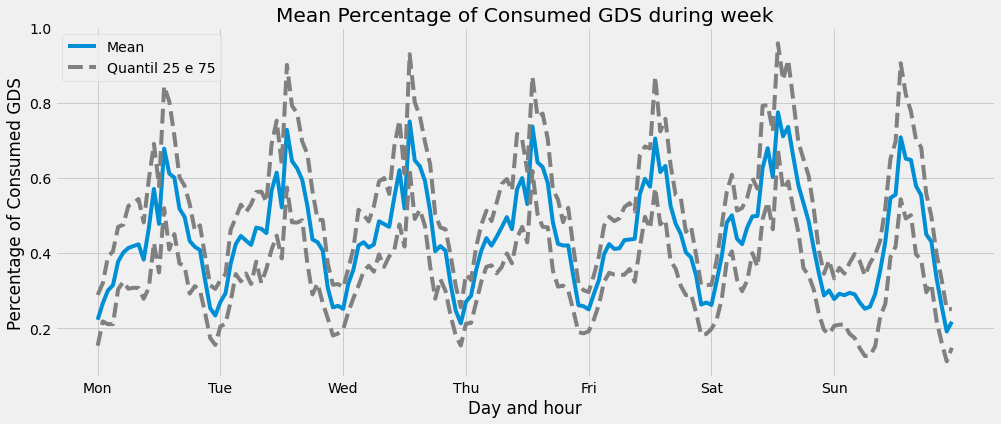

In [ ]:
###Seasonality plots###

# Boxplot chart for daily seasonality
# ==============================================================================
fig, ax = plt.subplots(figsize=(15, 6))
mean_day_hour = df.groupby(["DEPARTUREWEEKDAY", "DEPARTUREHOUR"])["OCCUPIED_SPACE_PERCENTAGE"].mean()
q25_day_hour = df.groupby(["DEPARTUREWEEKDAY", "DEPARTUREHOUR"])["OCCUPIED_SPACE_PERCENTAGE"].quantile(0.25)
q75_day_hour = df.groupby(["DEPARTUREWEEKDAY", "DEPARTUREHOUR"])["OCCUPIED_SPACE_PERCENTAGE"].quantile(0.75)

mean_day_hour.plot(ax=ax, label='Mean')
q25_day_hour.plot(ax=ax, linestyle='dashed', color='gray', label='')
q75_day_hour.plot(ax=ax, linestyle='dashed', color='gray', label='Quantil 25 e 75')


ax.set(
    title="Mean Percentage of Consumed GDS during week",
    xticks=[i * 24 for i in range(7)],
    xticklabels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"],
    xlabel="Day and hour",
    ylabel="Percentage of Consumed GDS"
)

ax.legend();
#plt.savefig('Percentage of Consumed GDS during week_2018.png');
#plt.savefig('Percentage of Consumed GDS during week_2019.png');

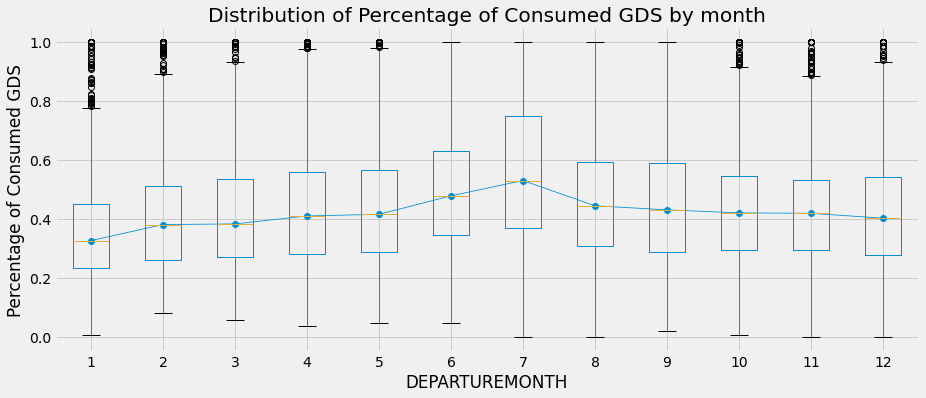

In [ ]:
# Boxplot for annual seasonality
# ==============================================================================
fig, ax = plt.subplots(figsize=(15, 6))
df['DEPARTUREMONTH'] = df.index.month
df.boxplot(column='OCCUPIED_SPACE_PERCENTAGE', by='DEPARTUREMONTH', ax=ax,)
df.groupby('DEPARTUREMONTH')['OCCUPIED_SPACE_PERCENTAGE'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('Percentage of Consumed GDS')
ax.set_title('Distribution of Percentage of Consumed GDS by month')
fig.suptitle('');
#plt.savefig('Distribution of Percentage of Consumed GDS by month_2018.png');
#plt.savefig('Distribution of Percentage of Consumed GDS by month_2019.png');

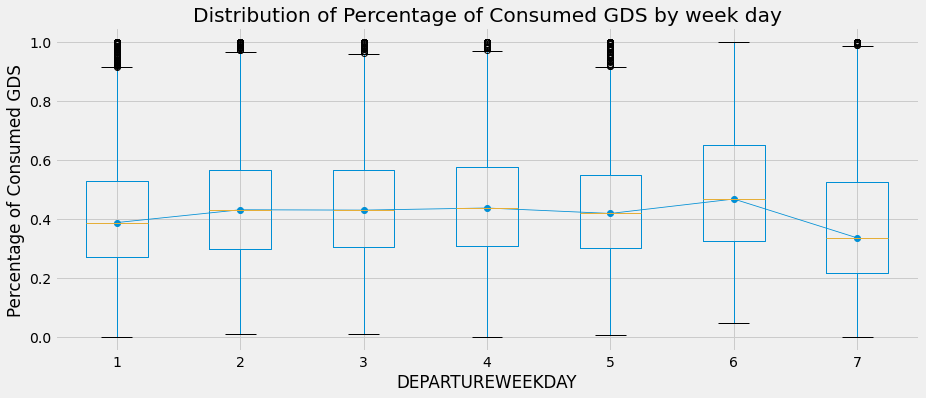

In [ ]:
# Boxplot for weekly seasonality
# ==============================================================================
fig, ax = plt.subplots(figsize=(15, 6))
df['DEPARTUREWEEKDAY'] = df.index.day_of_week + 1
df.boxplot(column='OCCUPIED_SPACE_PERCENTAGE', by='DEPARTUREWEEKDAY', ax=ax)
df.groupby('DEPARTUREWEEKDAY')['OCCUPIED_SPACE_PERCENTAGE'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('Percentage of Consumed GDS')
ax.set_title('Distribution of Percentage of Consumed GDS by week day')
fig.suptitle('');
#plt.savefig('Distribution of Percentage of Consumed GDS by week day_2018.png');
#plt.savefig('Distribution of Percentage of Consumed GDS by week day_2019.png');

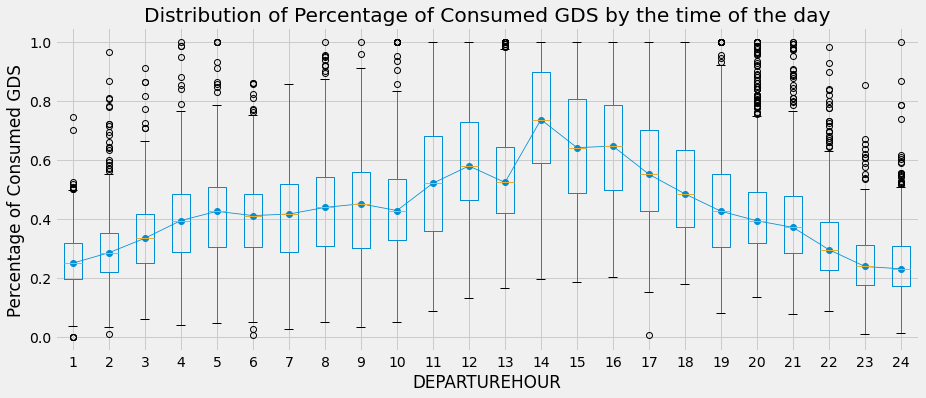

In [ ]:
# Boxplot for daily seasonality
# ==============================================================================
fig, ax = plt.subplots(figsize=(15, 6))
df['DEPARTUREHOUR'] = df.index.hour + 1
df.boxplot(column='OCCUPIED_SPACE_PERCENTAGE', by='DEPARTUREHOUR', ax=ax)
df.groupby('DEPARTUREHOUR')['OCCUPIED_SPACE_PERCENTAGE'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('Percentage of Consumed GDS')
ax.set_title('Distribution of Percentage of Consumed GDS by the time of the day')
fig.suptitle('');
#plt.savefig('Distribution of Percentage of Consumed GDS by the time of the day_2018.png');
#plt.savefig('Distribution of Percentage of Consumed GDS by the time of the day_2019.png');

In [ ]:
#Holidays and non-holiday days

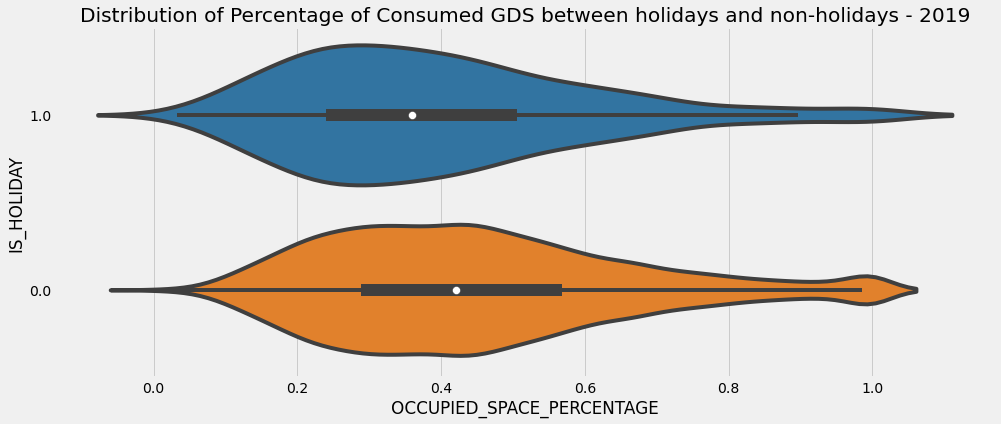

In [ ]:
# Violinplot
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
sns.violinplot(
    x       = 'OCCUPIED_SPACE_PERCENTAGE',
    y       = 'IS_HOLIDAY',
    data    = df.assign(IS_HOLIDAY= df.IS_HOLIDAY.astype(str)),
    palette = 'tab10',
    ax      = ax
)
ax.set_title('Distribution of Percentage of Consumed GDS between holidays and non-holidays - 2019')
ax.set_xlabel('OCCUPIED_SPACE_PERCENTAGE')
ax.set_ylabel('IS_HOLIDAY');
#plt.savefig('Distribution of Percentage of Consumed GDS between holidays and non-holidays_2018.png');
#plt.savefig('Distribution of Percentage of Consumed GDS between holidays and non-holidays_2019.png');

In [ ]:
###Autocorrelation plots

In [ ]:
import matplotlib.pyplot as plt

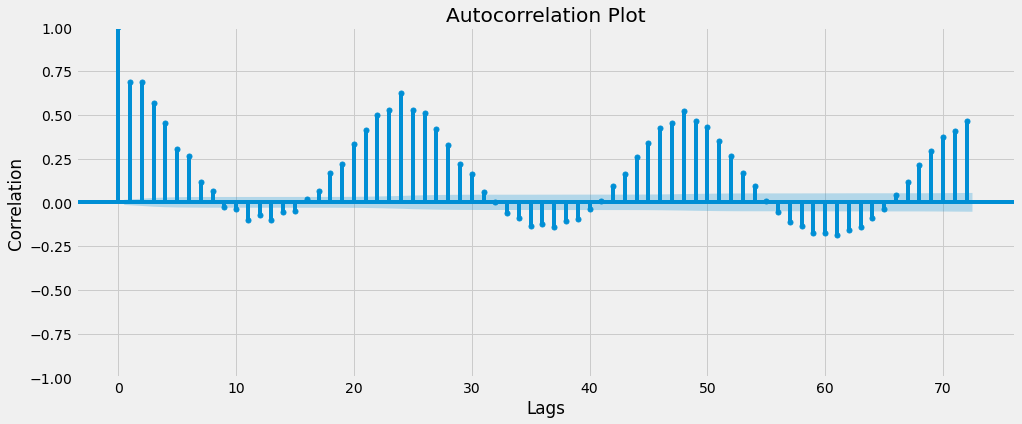

In [ ]:
# Autocorrelation plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(15, 6))
plot_acf(df['OCCUPIED_SPACE_PERCENTAGE'], ax=ax, lags=72)
ax.set_title('Autocorrelation Plot')
ax.set_xlabel('Lags')
ax.set_ylabel('Correlation');
#plt.savefig('correlation_2018.png')
#plt.savefig('correlation_2019.png')
plt.show()

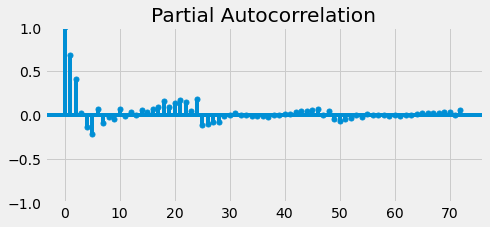

In [ ]:
# Partial autocorrelation plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(7, 3))
plot_pacf(df['OCCUPIED_SPACE_PERCENTAGE'], ax=ax, lags=72, method='ywm')
plt.show()

In [ ]:
df

OCCUPIED_SPACE_PERCENTAGE  IS_HOLIDAY  DEPARTUREMONTH  DEPARTUREDAY  DEPARTUREWEEKDAY  DEPARTUREHOUR  WINTER  SPRING  SUMMER  FALL  WORKINGDAY
DEPARTUREDATE                                                                                                                                                      
2018-01-01 00:00:00                      0.035         1.0               1           1.0                 1              1     1.0     0.0     0.0   0.0         0.0
2018-01-01 01:00:00                      0.093         1.0               1           1.0                 1              2     1.0     0.0     0.0   0.0         0.0
2018-01-01 02:00:00                      0.089         1.0               1           1.0                 1              3     1.0     0.0     0.0   0.0         0.0
2018-01-01 03:00:00                      0.067         1.0               1           1.0                 1              4     1.0     0.0     0.0   0.0         0.0
2018-01-01 04:00:00                      0.067         1.0               1           1.0                 1              5     1.0     0.0     0.0   0.0         0.0
...                                        ...         ...             ...           ...               ...            ...     ...     ...     ...   ...         ...
2019-12-31 19:00:00                      0.300         0.0              12          31.0                 2             20     1.0     0.0     0.0   0.0         1.0
2019-12-31 20:00:00                      0.246         0.0              12          31.0                 2             21     1.0     0.0     0.0   0.0         1.0
2019-12-31 21:00:00                      0.225         0.0              12          31.0                 2             22     1.0     0.0     0.0   0.0         1.0
2019-12-31 22:00:00                      0.101         0.0              12          31.0                 2             23     1.0     0.0     0.0   0.0         1.0
2019-12-31 23:00:00                      0.251         0.0              12          31.0                 2             24     1.0     0.0     0.0   0.0         1.0

[17520 rows x 11 columns]

In [ ]:
                                            ##CYCLICAL FEATURES ENCODING

In [ ]:
df.DEPARTUREHOUR = df.DEPARTUREHOUR.astype(int)

In [ ]:
#df.reset_index(inplace=True)

In [ ]:
df['DEPARTUREDATE'] = df.index

In [ ]:
df

OCCUPIED_SPACE_PERCENTAGE  IS_HOLIDAY  DEPARTUREMONTH  DEPARTUREDAY  DEPARTUREWEEKDAY  DEPARTUREHOUR  WINTER  SPRING  SUMMER  FALL  WORKINGDAY       DEPARTUREDATE
DEPARTUREDATE                                                                                                                                                                          
2018-01-01 00:00:00                      0.035         1.0               1           1.0                 1              1     1.0     0.0     0.0   0.0         0.0 2018-01-01 00:00:00
2018-01-01 01:00:00                      0.093         1.0               1           1.0                 1              2     1.0     0.0     0.0   0.0         0.0 2018-01-01 01:00:00
2018-01-01 02:00:00                      0.089         1.0               1           1.0                 1              3     1.0     0.0     0.0   0.0         0.0 2018-01-01 02:00:00
2018-01-01 03:00:00                      0.067         1.0               1           1.0                 1              4     1.0     0.0     0.0   0.0         0.0 2018-01-01 03:00:00
2018-01-01 04:00:00                      0.067         1.0               1           1.0                 1              5     1.0     0.0     0.0   0.0         0.0 2018-01-01 04:00:00
...                                        ...         ...             ...           ...               ...            ...     ...     ...     ...   ...         ...                 ...
2019-12-31 19:00:00                      0.300         0.0              12          31.0                 2             20     1.0     0.0     0.0   0.0         1.0 2019-12-31 19:00:00
2019-12-31 20:00:00                      0.246         0.0              12          31.0                 2             21     1.0     0.0     0.0   0.0         1.0 2019-12-31 20:00:00
2019-12-31 21:00:00                      0.225         0.0              12          31.0                 2             22     1.0     0.0     0.0   0.0         1.0 2019-12-31 21:00:00
2019-12-31 22:00:00                      0.101         0.0              12          31.0                 2             23     1.0     0.0     0.0   0.0         1.0 2019-12-31 22:00:00
2019-12-31 23:00:00                      0.251         0.0              12          31.0                 2             24     1.0     0.0     0.0   0.0         1.0 2019-12-31 23:00:00

[17520 rows x 12 columns]

In [ ]:
df['hour'] = [x.hour for x in df['DEPARTUREDATE']]

In [ ]:

#df['Day sin'] = np.sin(timestamp_s  (2  np.pi / day))
#df['Day cos'] = np.cos(timestamp_s  (2  np.pi / day))
df['Day sin'] = [np.sin(x * (2 * np.pi / 24))  for x in df['hour']]
df['Day cos'] = [np.cos(x * (2 * np.pi / 24)) for x in df['hour']]
df['Day sin'] = [round(x, 3) for x in df['Day sin']]
df['Day cos'] = [round(x, 3) for x in df['Day cos']]

In [ ]:
df = df.drop(columns='hour')

In [ ]:
#obtain dummy from dates
df = df.join(pd.get_dummies(df['DEPARTUREMONTH'], prefix='M'))
#data_encoded = data_encoded.join(pd.get_dummies(data_encoded['DEPARTUREDAY'], prefix='D'))
df = df.join(pd.get_dummies(df['DEPARTUREWEEKDAY'], prefix='WD'))
#data_encoded = data_encoded.join(pd.get_dummies(data_encoded['DEPARTUREWEEK'], prefix='W'))
#data_encoded = data_encoded.join(pd.get_dummies(data_encoded['DEPARTUREHOUR'], prefix='H'))
#data_encoded = data_encoded.join(pd.get_dummies(data_encoded['DEPARTUREMIN'], prefix='MI'))

df = df.drop(['DEPARTUREMONTH',
                            #'DEPARTUREDAY',
                            'DEPARTUREWEEKDAY',
                            #'DEPARTUREWEEK',
                            #'DEPARTUREHOUR'
                           # 'DEPARTUREMIN',
                                  'DEPARTUREDATE',
              'DEPARTUREHOUR',
                                  'DEPARTUREDAY'
                                ], axis=1)

In [ ]:
df

OCCUPIED_SPACE_PERCENTAGE  IS_HOLIDAY  WINTER  SPRING  SUMMER  FALL  WORKINGDAY  Day sin  Day cos  M_1  ...  M_10  M_11  M_12  WD_1  WD_2  WD_3  WD_4  WD_5  WD_6  WD_7
DEPARTUREDATE                                                                                                                ...                                                            
2018-01-01 00:00:00                      0.035         1.0     1.0     0.0     0.0   0.0         0.0    0.000    1.000    1  ...     0     0     0     1     0     0     0     0     0     0
2018-01-01 01:00:00                      0.093         1.0     1.0     0.0     0.0   0.0         0.0    0.259    0.966    1  ...     0     0     0     1     0     0     0     0     0     0
2018-01-01 02:00:00                      0.089         1.0     1.0     0.0     0.0   0.0         0.0    0.500    0.866    1  ...     0     0     0     1     0     0     0     0     0     0
2018-01-01 03:00:00                      0.067         1.0     1.0     0.0     0.0   0.0         0.0    0.707    0.707    1  ...     0     0     0     1     0     0     0     0     0     0
2018-01-01 04:00:00                      0.067         1.0     1.0     0.0     0.0   0.0         0.0    0.866    0.500    1  ...     0     0     0     1     0     0     0     0     0     0
...                                        ...         ...     ...     ...     ...   ...         ...      ...      ...  ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...
2019-12-31 19:00:00                      0.300         0.0     1.0     0.0     0.0   0.0         1.0   -0.966    0.259    0  ...     0     0     1     0     1     0     0     0     0     0
2019-12-31 20:00:00                      0.246         0.0     1.0     0.0     0.0   0.0         1.0   -0.866    0.500    0  ...     0     0     1     0     1     0     0     0     0     0
2019-12-31 21:00:00                      0.225         0.0     1.0     0.0     0.0   0.0         1.0   -0.707    0.707    0  ...     0     0     1     0     1     0     0     0     0     0
2019-12-31 22:00:00                      0.101         0.0     1.0     0.0     0.0   0.0         1.0   -0.500    0.866    0  ...     0     0     1     0     1     0     0     0     0     0
2019-12-31 23:00:00                      0.251         0.0     1.0     0.0     0.0   0.0         1.0   -0.259    0.966    0  ...     0     0     1     0     1     0     0     0     0     0

[17520 rows x 28 columns]

In [ ]:
for col in df.columns:
    print(col)

OCCUPIED_SPACE_PERCENTAGE
IS_HOLIDAY
WINTER
SPRING
SUMMER
FALL
WORKINGDAY
Day sin
Day cos
M_1
M_2
M_3
M_4
M_5
M_6
M_7
M_8
M_9
M_10
M_11
M_12
WD_1
WD_2
WD_3
WD_4
WD_5
WD_6
WD_7


In [ ]:
## Plot of the transformation
## ==============================================================================
#fig, ax = plt.subplots(figsize=(9,9))
#sp = ax.scatter(df["Day sin"], df["Day cos"], c=df["DEPARTUREHOUR"])
#ax.set(
#    xlabel="sin(day)",
#    ylabel="cos(day)",
#)
#_ = fig.colorbar(sp)
##plt.savefig("SinCosHour.png")
#
##df = df.drop(columns='DEPARTUREHOUR')

In [ ]:
## Transformation sine-cosine of variable hour
## ==============================================================================
#df['hour_sin'] = np.sin(df['DEPARTUREHOUR'] / 23 * 2 * np.pi)
#df['hour_cos'] = np.cos(df['DEPARTUREHOUR'] / 23 * 2 * np.pi)
#
## Plot of the transformation
## ==============================================================================
#fig, ax = plt.subplots(figsize=(9,9))
#sp = ax.scatter(df["hour_sin"], df["hour_cos"], c=df["DEPARTUREHOUR"])
#ax.set(
#    xlabel="sin(hour)",
#    ylabel="cos(hour)",
#)
#_ = fig.colorbar(sp)
##plt.savefig("SinCosHour.png")
#
##df = df.drop(columns='DEPARTUREHOUR')

In [ ]:
#df['DEPARTUREDATE'] = df.index

In [ ]:
#df

In [ ]:
#date_time = pd.to_datetime(df['DEPARTUREDATE'], format='%Y-%m-%d %H:%M:%S')
#timestamp_s = date_time.map(pd.Timestamp.timestamp)
#day = 24*60*60
#month = (30.4375)*day
#year = (365.2425)*day
#
##df['Day sin'] = np.sin(timestamp_s  *(2 * np.pi / day))
##df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
#df['Month sin'] = np.sin(timestamp_s * (2 * np.pi / month))
#df['Month cos'] = np.cos(timestamp_s * (2 * np.pi / month))
##df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
##df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

In [ ]:
#df['day_of_week_sin'] = np.sin(df['DEPARTUREWEEKDAY'] * (2 * np.pi / 7))
#df['day_of_week_cos'] = np.cos(df['DEPARTUREWEEKDAY'] * (2 * np.pi / 7))

In [ ]:
#df

In [ ]:
#df.set_index('DEPARTUREDATE', inplace=True)


In [ ]:
#df

In [ ]:
#df = df.drop(columns='DEPARTUREMONTH')
#df = df.drop(columns='DEPARTUREDAY')
#df = df.drop(columns='DEPARTUREWEEKDAY')
##df = df.drop(columns='DEPARTUREWEEK')
#df = df.drop(columns='DEPARTUREDATE')

In [ ]:
#df

In [ ]:
n_missing = len(df[df.isnull().any(axis=1)])
print(f"Valori mancanti: {n_missing} ({100 * n_missing / len(df):.2f}%)")

Valori mancanti: 0 (0.00%)


In [ ]:
df.isna().sum()

OCCUPIED_SPACE_PERCENTAGE    0
IS_HOLIDAY                   0
WINTER                       0
SPRING                       0
SUMMER                       0
FALL                         0
WORKINGDAY                   0
Day sin                      0
Day cos                      0
M_1                          0
M_2                          0
M_3                          0
M_4                          0
M_5                          0
M_6                          0
M_7                          0
M_8                          0
M_9                          0
M_10                         0
M_11                         0
M_12                         0
WD_1                         0
WD_2                         0
WD_3                         0
WD_4                         0
WD_5                         0
WD_6                         0
WD_7                         0
dtype: int64

In [ ]:
#se ci sono NA su alcune partenze, interpolare i valori con il metodo lineare

#df = df.interpolate(method='linear')

#alternativa per imputare valori null
#data_encoded = data_encoded.fillna(method='ffill')

In [ ]:
#n_missing = len(df[df.isnull().any(axis=1)])
#print(f"Valori mancanti: {n_missing} ({100 * n_missing / len(df):.2f}%)")#

In [ ]:
pd.DataFrame(df).to_csv('final_dataset.csv')

In [ ]:
data_encoded = df

In [ ]:
# Split train-val-test
# ==============================================================================
end_train = '2019-02-28 00:00:00' #'2018-09-30 00:00:00'
end_validation = '2019-06-30 23:00:00'
data_train = data_encoded.loc[: end_train, :]
data_val   = data_encoded.loc[end_train:end_validation, :]
data_test  = data_encoded.loc[end_validation:, :]

print(f"Dates train      : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Dates validacion : {data_val.index.min()} --- {data_val.index.max()}  (n={len(data_val)})")
print(f"Dates test       : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

Dates train      : 2018-01-01 00:00:00 --- 2019-02-28 00:00:00  (n=10153)
Dates validacion : 2019-02-28 00:00:00 --- 2019-06-30 23:00:00  (n=2952)
Dates test       : 2019-06-30 23:00:00 --- 2019-12-31 23:00:00  (n=4417)


In [ ]:
data_encoded

OCCUPIED_SPACE_PERCENTAGE  IS_HOLIDAY  WINTER  SPRING  SUMMER  FALL  WORKINGDAY  Day sin  Day cos  M_1  ...  M_10  M_11  M_12  WD_1  WD_2  WD_3  WD_4  WD_5  WD_6  WD_7
DEPARTUREDATE                                                                                                                ...                                                            
2018-01-01 00:00:00                      0.035         1.0     1.0     0.0     0.0   0.0         0.0    0.000    1.000    1  ...     0     0     0     1     0     0     0     0     0     0
2018-01-01 01:00:00                      0.093         1.0     1.0     0.0     0.0   0.0         0.0    0.259    0.966    1  ...     0     0     0     1     0     0     0     0     0     0
2018-01-01 02:00:00                      0.089         1.0     1.0     0.0     0.0   0.0         0.0    0.500    0.866    1  ...     0     0     0     1     0     0     0     0     0     0
2018-01-01 03:00:00                      0.067         1.0     1.0     0.0     0.0   0.0         0.0    0.707    0.707    1  ...     0     0     0     1     0     0     0     0     0     0
2018-01-01 04:00:00                      0.067         1.0     1.0     0.0     0.0   0.0         0.0    0.866    0.500    1  ...     0     0     0     1     0     0     0     0     0     0
...                                        ...         ...     ...     ...     ...   ...         ...      ...      ...  ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...
2019-12-31 19:00:00                      0.300         0.0     1.0     0.0     0.0   0.0         1.0   -0.966    0.259    0  ...     0     0     1     0     1     0     0     0     0     0
2019-12-31 20:00:00                      0.246         0.0     1.0     0.0     0.0   0.0         1.0   -0.866    0.500    0  ...     0     0     1     0     1     0     0     0     0     0
2019-12-31 21:00:00                      0.225         0.0     1.0     0.0     0.0   0.0         1.0   -0.707    0.707    0  ...     0     0     1     0     1     0     0     0     0     0
2019-12-31 22:00:00                      0.101         0.0     1.0     0.0     0.0   0.0         1.0   -0.500    0.866    0  ...     0     0     1     0     1     0     0     0     0     0
2019-12-31 23:00:00                      0.251         0.0     1.0     0.0     0.0   0.0         1.0   -0.259    0.966    0  ...     0     0     1     0     1     0     0     0     0     0

[17520 rows x 28 columns]

In [ ]:
# Select exogenous variables, including those generated by one hot encoding.
exog_variables = [column for column in data_encoded.columns
                      if column.startswith(('WD_','Day','M_'))]
exog_variables.extend(['IS_HOLIDAY','WORKINGDAY',	'WINTER',	'SPRING',	'SUMMER',	'FALL'])
print(exog_variables)

['Day sin', 'Day cos', 'M_1', 'M_2', 'M_3', 'M_4', 'M_5', 'M_6', 'M_7', 'M_8', 'M_9', 'M_10', 'M_11', 'M_12', 'WD_1', 'WD_2', 'WD_3', 'WD_4', 'WD_5', 'WD_6', 'WD_7', 'IS_HOLIDAY', 'WORKINGDAY', 'WINTER', 'SPRING', 'SUMMER', 'FALL']


In [ ]:
#CORRELATION
#corr = data_encoded.corr()
#corr
#sns.heatmap(corr)

''

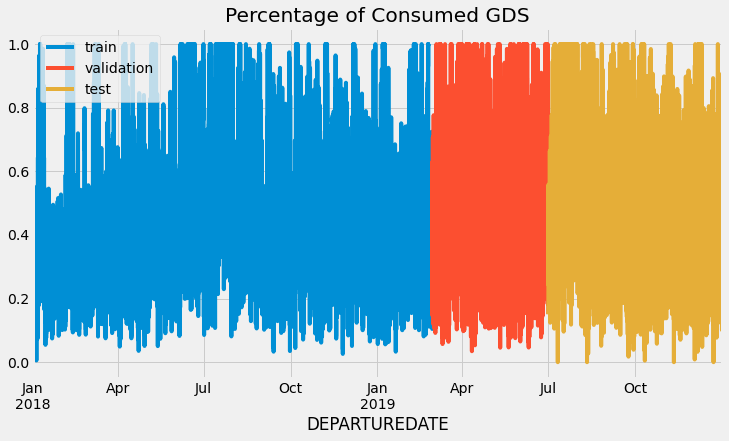

In [ ]:
# Plot time series
# ==============================================================================
fig, ax = plt.subplots(figsize=(11, 6))
data_train['OCCUPIED_SPACE_PERCENTAGE'].plot(ax=ax, label='train')
data_val['OCCUPIED_SPACE_PERCENTAGE'].plot(ax=ax, label='validation')
data_test['OCCUPIED_SPACE_PERCENTAGE'].plot(ax=ax, label='test')
ax.set_title('Percentage of Consumed GDS')
ax.legend()
plt.savefig("SplitDataset2018_2019.png")
;

''

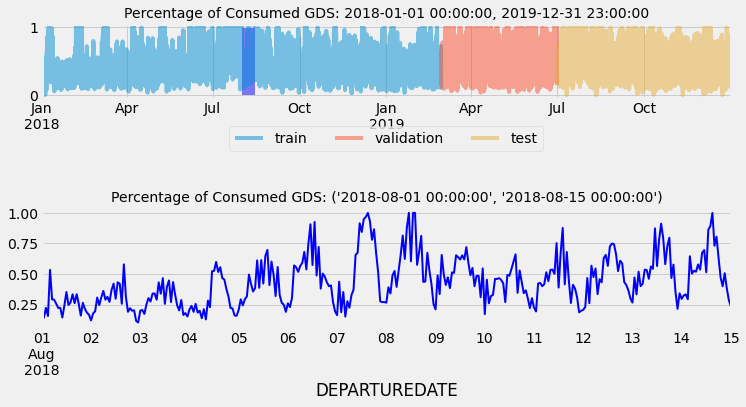

In [ ]:
#  Plot time series with zoom
# ==============================================================================
zoom = ('2018-08-01 00:00:00','2018-08-15 00:00:00')

fig = plt.figure(figsize=(11, 6))
grid = plt.GridSpec(nrows=8, ncols=1, hspace=0.6, wspace=0)

main_ax = fig.add_subplot(grid[1:3, :])
zoom_ax = fig.add_subplot(grid[5:, :])

data_train['OCCUPIED_SPACE_PERCENTAGE'].plot(ax=main_ax, label='train', alpha=0.5)
data_val['OCCUPIED_SPACE_PERCENTAGE'].plot(ax=main_ax, label='validation', alpha=0.5)
data_test['OCCUPIED_SPACE_PERCENTAGE'].plot(ax=main_ax, label='test', alpha=0.5)
min_y = min(data_encoded['OCCUPIED_SPACE_PERCENTAGE'])
max_y = max(data_encoded['OCCUPIED_SPACE_PERCENTAGE'])
main_ax.fill_between(zoom, min_y, max_y, facecolor='blue', alpha=0.5, zorder=0)
main_ax.set_xlabel('')
main_ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.8))

data_encoded.loc[zoom[0]: zoom[1]]['OCCUPIED_SPACE_PERCENTAGE'].plot(ax=zoom_ax, color='blue', linewidth=2)

main_ax.set_title(f'Percentage of Consumed GDS: {data_encoded.index.min()}, {data_encoded.index.max()}', fontsize=14)
zoom_ax.set_title(f'Percentage of Consumed GDS: {zoom}', fontsize=14)
plt.subplots_adjust(hspace=1)
#plt.savefig("SplitDatasetandFocusOnRange2018_2019.png")
;

In [ ]:
# Interactive plot of time series
# ==============================================================================
data_encoded.loc[:end_train, 'partition'] = 'train'
data_encoded.loc[end_train:end_validation, 'partition'] = 'validation'
data_encoded.loc[end_validation:, 'partition'] = 'test'

fig = px.line(
    data_frame = data_encoded.reset_index(),
    x      = 'DEPARTUREDATE',
    y      = 'OCCUPIED_SPACE_PERCENTAGE',
    color  = 'partition',
    title  = 'Percentage of Consumed GDS',
    width  = 900,
    height = 500
)

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.show()

data=data_encoded.drop(columns='partition')

In [ ]:
                                                    ## Random Forest ##

In [ ]:
# Hyperparameter Grid search
# ==============================================================================
forecaster_RF = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 24 # This value will be replaced in the grid search
             )

param_grid = {'n_estimators': [50, 100, 500],
              'max_depth': [3, 5, 10]}

lags_grid = [24, 72, 168, 336, 672] #[5, 12, 20]

results_grid = grid_search_forecaster(
                        forecaster         = forecaster_RF,
                        y                  = data_encoded.loc[:end_validation, 'OCCUPIED_SPACE_PERCENTAGE'],
                        exog               = data_encoded.loc[:end_validation, exog_variables],
                        param_grid  = param_grid,
                        lags_grid   = lags_grid,
                        steps       = 24,
                        refit       = False,
                        metric      = 'mean_squared_error',
                        initial_train_size = int(len(data_train)),
                        return_best = True,
                        verbose     = False
                    )

Number of models compared: 45


loop lags_grid: 100%|███████████████████████████████████| 5/5 [2:48:41<00:00, 2024.33s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 22

In [ ]:
# Grid Search results
# ==============================================================================
results_grid.head()

lags                                  params    metric  max_depth  n_estimators
44  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  {'max_depth': 10, 'n_estimators': 500}  0.024805         10           500
43  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  {'max_depth': 10, 'n_estimators': 100}  0.025100         10           100
42  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   {'max_depth': 10, 'n_estimators': 50}  0.025203         10            50
24  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   {'max_depth': 10, 'n_estimators': 50}  0.025257         10            50
25  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  {'max_depth': 10, 'n_estimators': 100}  0.025406         10           100

In [ ]:
# Predictors importance
# ==============================================================================
importance_RF = forecaster_RF.get_feature_importance()
importance_RF

feature  importance
0         lag_1    0.429957
1         lag_2    0.135027
2         lag_3    0.042823
3         lag_4    0.002475
4         lag_5    0.000889
..          ...         ...
694  WORKINGDAY    0.000144
695      WINTER    0.000023
696      SPRING    0.000085
697      SUMMER    0.000011
698        FALL    0.000017

[699 rows x 2 columns]

In [ ]:
importance_RF.sort_values(by='importance',ascending=False)

feature  importance
0      lag_1    0.429957
1      lag_2    0.135027
23    lag_24    0.103665
2      lag_3    0.042823
673  Day cos    0.032319
..       ...         ...
689     WD_4    0.000009
684     M_11    0.000008
683     M_10    0.000007
681      M_8    0.000007
685     M_12    0.000003

[699 rows x 2 columns]

In [ ]:
importance_RF= importance_RF.sort_values(by='importance',ascending=False).head(10)

In [ ]:
importance_RF.reset_index(inplace=True)

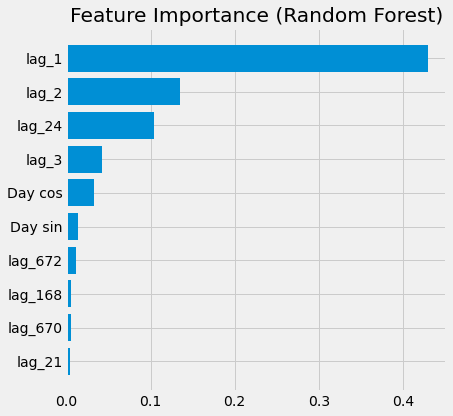

In [ ]:
sorted_idx = np.argsort(importance_RF.importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5

fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, importance_RF.importance[sorted_idx], align="center")
plt.yticks(pos, importance_RF.feature[sorted_idx])
plt.title("Feature Importance (Random Forest)")

fig.tight_layout()
plt.show()

In [ ]:
# Backtesting
# ==============================================================================

metric, predictions_backtest = backtesting_forecaster(
                                    forecaster = forecaster_RF,
    y                  = data_encoded['OCCUPIED_SPACE_PERCENTAGE'],
    exog               = data_encoded[exog_variables],
    initial_train_size = len(data_encoded.loc[:end_validation]),
    steps              = 24,
    refit              = False,
                                    metric     = 'mean_squared_error',
                                    verbose    = True
                               )

print(f"Backtest error: {metric}")

Information of backtesting process
----------------------------------
Number of observations used for initial training or as initial window: 13104
Number of observations used for backtesting: 4416
    Number of folds: 184
    Number of steps per fold: 24

Data partition in fold: 0
    Training:   2018-01-01 00:00:00 -- 2019-06-30 23:00:00
    Validation: 2019-07-01 00:00:00 -- 2019-07-01 23:00:00
Data partition in fold: 1
    Training:   2018-01-01 00:00:00 -- 2019-06-30 23:00:00
    Validation: 2019-07-02 00:00:00 -- 2019-07-02 23:00:00
Data partition in fold: 2
    Training:   2018-01-01 00:00:00 -- 2019-06-30 23:00:00
    Validation: 2019-07-03 00:00:00 -- 2019-07-03 23:00:00
Data partition in fold: 3
    Training:   2018-01-01 00:00:00 -- 2019-06-30 23:00:00
    Validation: 2019-07-04 00:00:00 -- 2019-07-04 23:00:00
Data partition in fold: 4
    Training:   2018-01-01 00:00:00 -- 2019-06-30 23:00:00
    Validation: 2019-07-05 00:00:00 -- 2019-07-05 23:00:00
Data partition in fold: 

Backtest error: 0.020569246240947348


In [ ]:
#predictions = forecaster.predict(steps=24, exog = data_test[exog_variables])

In [ ]:
predictions_backtest

pred
2019-07-01 00:00:00  0.294717
2019-07-01 01:00:00  0.227923
2019-07-01 02:00:00  0.349065
2019-07-01 03:00:00  0.330052
2019-07-01 04:00:00  0.396853
...                       ...
2019-12-31 19:00:00  0.396533
2019-12-31 20:00:00  0.363586
2019-12-31 21:00:00  0.287874
2019-12-31 22:00:00  0.267392
2019-12-31 23:00:00  0.240015

[4416 rows x 1 columns]

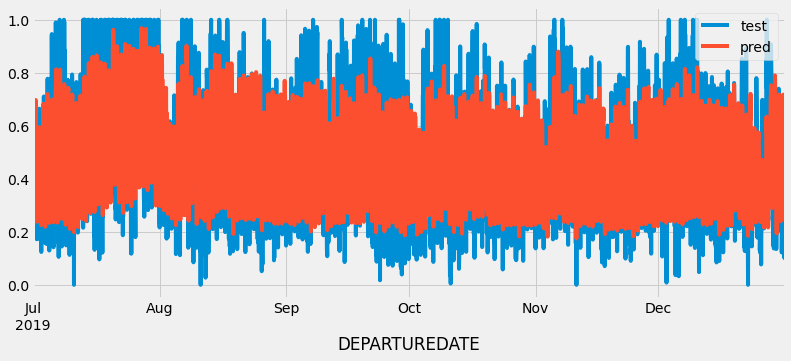

In [ ]:
# Plot
# ==============================================================================
fig, ax=plt.subplots(figsize=(12, 5))
data_test['OCCUPIED_SPACE_PERCENTAGE'].plot(ax=ax, label='test')
predictions_backtest.plot(ax=ax, label='predictions')
ax.legend()
#plt.savefig('Prediction_RF_1.png');

In [ ]:
data_test

OCCUPIED_SPACE_PERCENTAGE  IS_HOLIDAY  WINTER  SPRING  SUMMER  FALL  WORKINGDAY  Day sin  Day cos  M_1  ...  M_10  M_11  M_12  WD_1  WD_2  WD_3  WD_4  WD_5  WD_6  WD_7
DEPARTUREDATE                                                                                                                ...                                                            
2019-06-30 23:00:00                      0.151         0.0     0.0     0.0     1.0   0.0         0.0   -0.259    0.966    0  ...     0     0     0     0     0     0     0     0     0     1
2019-07-01 00:00:00                      0.183         0.0     0.0     0.0     1.0   0.0         1.0    0.000    1.000    0  ...     0     0     0     1     0     0     0     0     0     0
2019-07-01 01:00:00                      0.304         0.0     0.0     0.0     1.0   0.0         1.0    0.259    0.966    0  ...     0     0     0     1     0     0     0     0     0     0
2019-07-01 02:00:00                      0.304         0.0     0.0     0.0     1.0   0.0         1.0    0.500    0.866    0  ...     0     0     0     1     0     0     0     0     0     0
2019-07-01 03:00:00                      0.243         0.0     0.0     0.0     1.0   0.0         1.0    0.707    0.707    0  ...     0     0     0     1     0     0     0     0     0     0
...                                        ...         ...     ...     ...     ...   ...         ...      ...      ...  ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...
2019-12-31 19:00:00                      0.300         0.0     1.0     0.0     0.0   0.0         1.0   -0.966    0.259    0  ...     0     0     1     0     1     0     0     0     0     0
2019-12-31 20:00:00                      0.246         0.0     1.0     0.0     0.0   0.0         1.0   -0.866    0.500    0  ...     0     0     1     0     1     0     0     0     0     0
2019-12-31 21:00:00                      0.225         0.0     1.0     0.0     0.0   0.0         1.0   -0.707    0.707    0  ...     0     0     1     0     1     0     0     0     0     0
2019-12-31 22:00:00                      0.101         0.0     1.0     0.0     0.0   0.0         1.0   -0.500    0.866    0  ...     0     0     1     0     1     0     0     0     0     0
2019-12-31 23:00:00                      0.251         0.0     1.0     0.0     0.0   0.0         1.0   -0.259    0.966    0  ...     0     0     1     0     1     0     0     0     0     0

[4417 rows x 28 columns]

In [ ]:
data_test = data_test['2019-07-01 00:00:00' : '2019-12-31 23:00:00']

In [ ]:
y_true = data_test['OCCUPIED_SPACE_PERCENTAGE']

In [ ]:
y_true = data_test['OCCUPIED_SPACE_PERCENTAGE']
y_pred_RF = predictions_backtest
y_true, y_pred_RF
MAE_RF = mean_absolute_error(y_true, y_pred_RF)
#print (MAE)
print(f"Test error (MAE_RF) {MAE_RF}")


Test error (MAE_RF) 0.11131130758376519


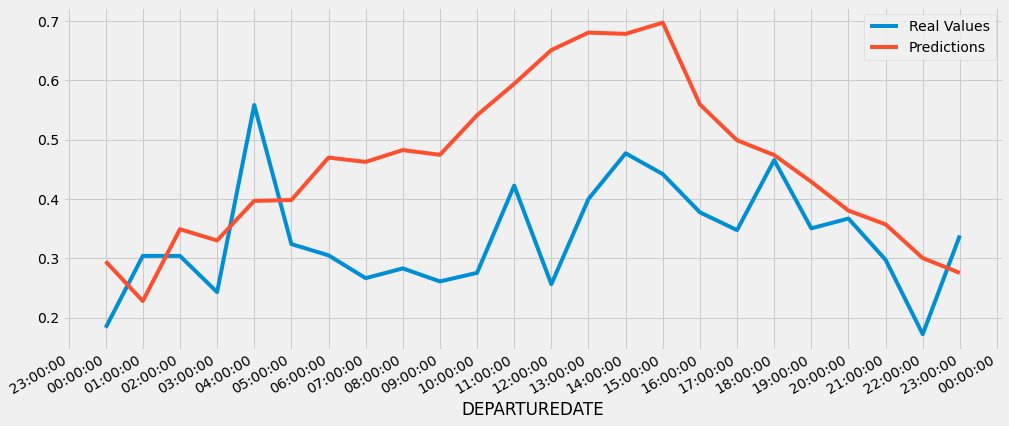

''

In [ ]:
# Plot of predictions
# ==============================================================================
hours = mdates.HourLocator(interval = 1)
h_fmt = mdates.DateFormatter('%H:%M:%S')

fig, ax = plt.subplots(figsize=(15, 7))
data_test.loc['2019-07-01 00:00:00' : '2019-07-01 23:00:00','OCCUPIED_SPACE_PERCENTAGE'].plot(ax=ax, label='Real Values',x_compat=True)
predictions_backtest.loc['2019-07-01 00:00:00' : '2019-07-01 23:00:00','pred'].plot(ax=ax, label='Predictions')

#Then tick and format with matplotlib:
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt)

fig.autofmt_xdate()

ax.legend()
plt.savefig('Prediction_RF_24H.png')
plt.show()
;

In [ ]:
                                                         ##XGBoost##

In [ ]:
# Create forecaster
# ==============================================================================
forecaster_XGBR = ForecasterAutoreg(
                regressor = XGBRegressor(random_state=123),
                lags = 24
             )

In [ ]:
# Grid search of hyperparameters and lags
# ==============================================================================
# Regressor hyperparameters
param_grid = {
    'n_estimators': [100, 500],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1]
}

# Lags used as predictors
lags_grid = [24, 72, 168, 336, 672] #[72, [1, 2, 3, 23, 24, 25, 71, 72, 73]]

results_grid = grid_search_forecaster(
                        forecaster         = forecaster_XGBR,
                        y                  = data_encoded.loc[:end_validation, 'OCCUPIED_SPACE_PERCENTAGE'],
                        exog               = data_encoded.loc[:end_validation, exog_variables],
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = 24,
                        refit              = False,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(data_train)),
                        return_best        = True,
                        verbose            = False
                   )

Number of models compared: 60


loop lags_grid: 100%|██████████████████████████████████████| 5/5 [38:10<00:00, 458.18s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 22

In [ ]:
# Backtesting
# ==============================================================================
metric, predictions_XGBR = backtesting_forecaster(
    forecaster         = forecaster_XGBR,
    y                  = data_encoded['OCCUPIED_SPACE_PERCENTAGE'],
    exog               = data_encoded[exog_variables],
    initial_train_size = len(data_encoded.loc[:end_validation]),
    steps              = 24,
    refit              = False,
    metric             = 'mean_squared_error',
    verbose            = False
)

print(f"Backtest error: {metric}")

Backtest error: 0.019165920633345546


In [ ]:
predictions_XGBR

pred
2019-07-01 00:00:00  0.300219
2019-07-01 01:00:00  0.235978
2019-07-01 02:00:00  0.384637
2019-07-01 03:00:00  0.346080
2019-07-01 04:00:00  0.452013
...                       ...
2019-12-31 19:00:00  0.380612
2019-12-31 20:00:00  0.338576
2019-12-31 21:00:00  0.304422
2019-12-31 22:00:00  0.211827
2019-12-31 23:00:00  0.278451

[4416 rows x 1 columns]

In [ ]:
#ERR= 0.0306

In [ ]:
#pd.set_option('display.max_rows',100)


In [ ]:
# Extract feature importance
# ==============================================================================
importance_XGBR = forecaster_XGBR.get_feature_importance()
importance_XGBR
importance_XGBR.sort_values(by='importance',ascending=False)


feature  importance
23    lag_24    0.061222
1      lag_2    0.054823
0      lag_1    0.052647
671  lag_672    0.042241
673  Day cos    0.025496
..       ...         ...
501  lag_502    0.000000
499  lag_500    0.000000
492  lag_493    0.000000
480  lag_481    0.000000
698     FALL    0.000000

[699 rows x 2 columns]

In [ ]:
importance_XGBR_10= importance_XGBR.sort_values(by='importance',ascending=False).head(10)

In [ ]:
importance_XGBR_10.reset_index(inplace=True)

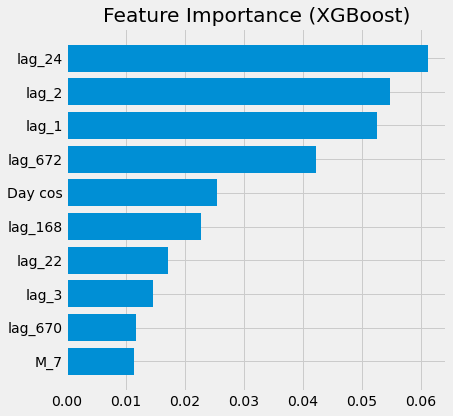

In [ ]:
sorted_idx = np.argsort(importance_XGBR_10.importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5

fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, importance_XGBR_10.importance[sorted_idx], align="center")
plt.yticks(pos, importance_XGBR_10.feature[sorted_idx])
plt.title("Feature Importance (XGBoost)")

fig.tight_layout()
plt.show()

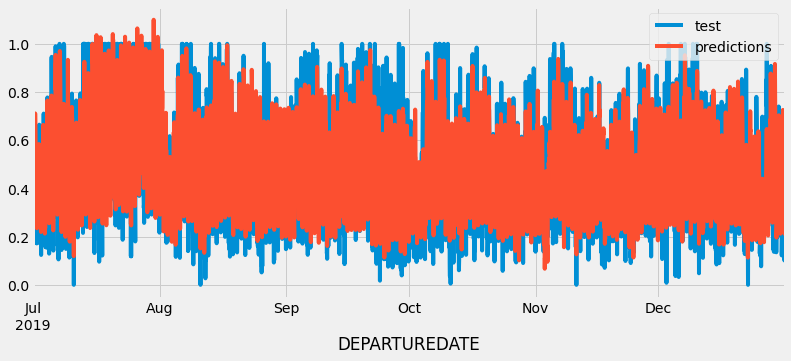

In [ ]:
# Plot of predictions
# ==============================================================================
fig, ax = plt.subplots(figsize=(12, 5))
data_test['OCCUPIED_SPACE_PERCENTAGE'].plot(ax=ax, label='test')
predictions_XGBR['pred'].plot(ax=ax, label='predictions')
ax.legend()
plt.savefig('Prediction_XGBR_1.png');

In [ ]:
# Interactive plot of predictions
# ==============================================================================
data_plot = pd.DataFrame({
                'test': data_test['OCCUPIED_SPACE_PERCENTAGE'],
                'prediction': predictions_XGBR['pred']

                 })
data_plot.index.name = 'DEPARTUREDATE'

fig = px.line(
    data_frame = data_plot.reset_index(),
    x      = 'DEPARTUREDATE',
    y      = data_plot.columns,
    title  = 'Percentage of Consumed GDS',
    width  = 900,
    height = 500
)

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [ ]:
#y_true = data_test['OCCUPIED_SPACE_PERCENTAGE']
y_pred_XGBR = predictions_XGBR['pred']
y_true, y_pred_XGBR
MAE_XGBR = mean_absolute_error(y_true, y_pred_XGBR)
#print (MAE)
print(f"Test error (MAE_XGBR) {MAE_XGBR}")


Test error (MAE_XGBR) 0.10766814737120543


In [ ]:
                                                        ###LightGBM###

In [ ]:
# Create forecaster
# ==============================================================================
forecaster_LGBM = ForecasterAutoreg(
                regressor = LGBMRegressor(random_state=123),
                lags = 24
             )

forecaster_LGBM

ForecasterAutoreg 
Regressor: LGBMRegressor(random_state=123) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] 
Window size: 24 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: None 
Training index type: None 
Training index frequency: None 
Regressor parameters: {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': 123, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0} 
Creation date: 2022-04-14 14:18:09 
Last fit date: None 
Skforecast version: 0.4.3 

In [ ]:
# Grid search of hyperparameters and lags
# ==============================================================================
# Regressor hyperparameters
param_grid = {
    'n_estimators': [100, 500],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1]
}

# Lags used as predictors
lags_grid = [24, 72, 168, 336, 672] #[72, [1, 2, 3, 23, 24, 25, 71, 72, 73]]

results_grid = grid_search_forecaster(
                        forecaster         = forecaster_LGBM,
                        y                  = data_encoded.loc[:end_validation, 'OCCUPIED_SPACE_PERCENTAGE'],
                        exog               = data_encoded.loc[:end_validation, exog_variables],
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = 24,
                        refit              = False,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(data_train)),
                        return_best        = True,
                        verbose            = False
                   )

Number of models compared: 60


loop lags_grid: 100%|███████████████████████████████████████| 5/5 [04:37<00:00, 55.41s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 22

In [ ]:
# Results grid search
# ==============================================================================
results_grid.head(10)

lags                                             params    metric  learning_rate  max_depth  n_estimators
55  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...  0.023025           0.10        3.0         500.0
51  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  {'learning_rate': 0.01, 'max_depth': 5, 'n_est...  0.023175           0.01        5.0         500.0
53  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  {'learning_rate': 0.01, 'max_depth': 10, 'n_es...  0.023302           0.01       10.0         500.0
56  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...  0.023379           0.10        5.0         100.0
54  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...  0.023436           0.10        3.0         100.0
58  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  {'learning_rate': 0.1, 'max_depth': 10, 'n_est...  0.023624           0.10       10.0         100.0
49  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  {'learning_rate': 0.01, 'max_depth': 3, 'n_est...  0.023821           0.01        3.0         500.0
57  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...  0.023956           0.10        5.0         500.0
30  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...  0.024110           0.10        3.0         100.0
39  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  {'learning_rate': 0.01, 'max_depth': 5, 'n_est...  0.024129           0.01        5.0         500.0

In [ ]:
# Backtest with test data and prediction intervals
# ==============================================================================
metric, predictions_LGBM = backtesting_forecaster(
                            forecaster = forecaster_LGBM,
                            y =  data_encoded['OCCUPIED_SPACE_PERCENTAGE'],
                            exog = data_encoded[exog_variables],
                            initial_train_size = len(data_encoded.loc[:end_validation]),
                            steps      = 24,
                            metric     = 'mean_absolute_error',
                            interval            = [10, 90],
                            n_boot              = 500,
                            in_sample_residuals = True,
                            verbose             = False
                       )

print('Backtesting metric:', metric)

predictions_LGBM.head(5)

Finished loading model, total used 500 iterations
Backtesting metric: 0.10649149539312056


pred  lower_bound  upper_bound
2019-07-01 00:00:00  0.290849     0.192529     0.372080
2019-07-01 01:00:00  0.242796     0.149108     0.344948
2019-07-01 02:00:00  0.362326     0.257257     0.465533
2019-07-01 03:00:00  0.341011     0.231206     0.435925
2019-07-01 04:00:00  0.434226     0.314740     0.532273

In [ ]:
data_test.OCCUPIED_SPACE_PERCENTAGE


DEPARTUREDATE
2019-07-01 00:00:00    0.1830
2019-07-01 01:00:00    0.3040
2019-07-01 02:00:00    0.3040
2019-07-01 03:00:00    0.2430
2019-07-01 04:00:00    0.5585
                        ...  
2019-12-31 19:00:00    0.3000
2019-12-31 20:00:00    0.2460
2019-12-31 21:00:00    0.2250
2019-12-31 22:00:00    0.1010
2019-12-31 23:00:00    0.2510
Freq: H, Name: OCCUPIED_SPACE_PERCENTAGE, Length: 4416, dtype: float64

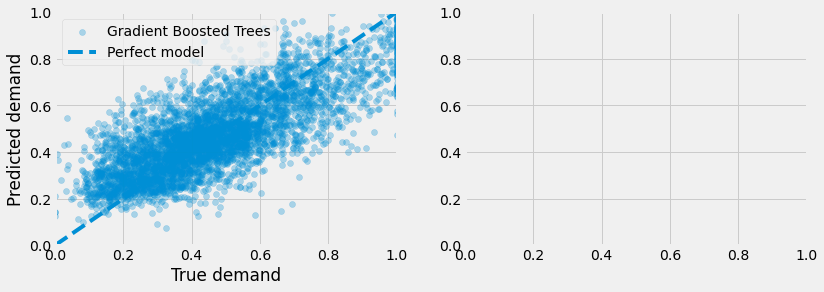

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))

fig.suptitle("")
predictions = [
    predictions_LGBM
]
labels = [
    "Gradient Boosted Trees",
]
for ax, pred, label in zip(axes, predictions, labels):
    ax.scatter(data_test.OCCUPIED_SPACE_PERCENTAGE, predictions_LGBM.pred, alpha=0.3, label=label)
    ax.plot([0, 1], [0, 1], "--", label="Perfect model")
    ax.set(
        xlim=(0, 1),
        ylim=(0, 1),
        xlabel="True demand",
        ylabel="Predicted demand",
    )
    ax.legend()

In [ ]:
#predictions_LGBM.pred
#
#predictions_LGBM.loc['2019-07-15 00:00:00' : '2019-07-15 23:00:00', ]
#
#real = data_encoded.loc['2019-07-15 00:00:00' : '2019-07-15 23:00:00', 'OCCUPIED_SPACE_PERCENTAGE']
#
#real
#
#predictions= predictions_LGBM.loc['2019-07-15 00:00:00' : '2019-07-15 23:00:00', 'pred']
#
#predictions
#
#predictions = pd.DataFrame(data = predictions)
#
#predictions.insert(loc=1,
#          column='real',
#          value=real)
#
#predictions

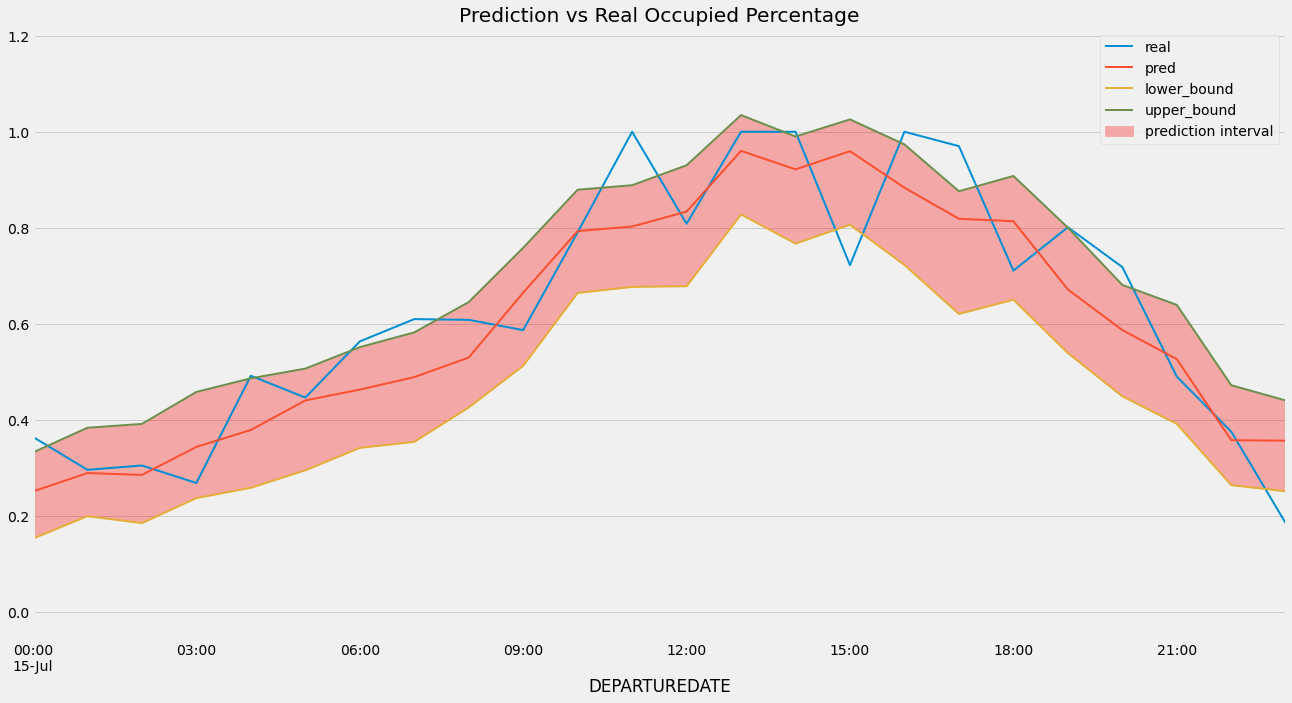

''

In [ ]:
# Plot
# ==============================================================================
hours = mdates.HourLocator(interval = 1)
h_fmt = mdates.DateFormatter('%H:%M:%S')

fig, ax = plt.subplots(figsize=(20, 10.5))
data_encoded.loc['2019-07-15 00:00:00' : '2019-07-15 23:00:00', 'OCCUPIED_SPACE_PERCENTAGE'].plot(linewidth=2, label='real', ax=ax)
predictions_LGBM.loc['2019-07-15 00:00:00' : '2019-07-15 23:00:00', ].plot(linewidth=2, label='prediction', ax=ax)
ax.set_title('Prediction vs Real Occupied Percentage')
ax.fill_between(
    predictions_LGBM.index,
    predictions_LGBM.iloc[:, 1],
    predictions_LGBM.iloc[:, 2],
    alpha = 0.3,
    color = 'red',
    label = 'prediction interval'
)

#Then tick and format with matplotlib:
#ax.xaxis.set_major_locator(hours)
#ax.xaxis.set_major_formatter(h_fmt)

#fig.autofmt_xdate()

ax.legend()#(fontsize=20)
plt.savefig('predictions_LGBM_2019-07-15.png')
plt.show()
;

In [ ]:
# Backtesting
# ==============================================================================
metric, predictions_LGBM_1 = backtesting_forecaster(
    forecaster         = forecaster_LGBM,
    y                  = data_encoded['OCCUPIED_SPACE_PERCENTAGE'],
    exog               = data_encoded[exog_variables],
    initial_train_size = len(data_encoded.loc[:end_validation]),
    steps              = 24,
    refit              = False,
    metric             = 'mean_squared_error',
    verbose            = False
)

print(f"Backtest error: {metric}")

Finished loading model, total used 500 iterations
Backtest error: 0.01881694312257886


In [ ]:
#Importance = {'feature': ['Day', 'WeekDday_6', 'Month_7', 'WorkingDay', 'IS_Holiday'], 'importance': [126, 96, 88, 72,52]}

In [ ]:
#Importance = pd.DataFrame(data = Importance)

In [ ]:
#Importance

In [ ]:
##importance_LGBMR_10 = importance_LGBMR.sort_values(by='importance',ascending=False).head(10)
#
#sorted_idx = np.argsort(Importance.importance)
#pos = np.arange(sorted_idx.shape[0]) + 0.5
#
#fig = plt.figure(figsize=(12, 6))
#plt.subplot(1, 2, 1)
#plt.barh(pos, Importance.importance[sorted_idx], align="center")
#plt.yticks(pos, Importance.feature[sorted_idx])
#plt.title("Feature Importance")
#
#fig.tight_layout()
#plt.show()

In [ ]:
# Feature importance
# ==============================================================================
importance_LGBMR = forecaster_LGBM.get_feature_importance()
importance_LGBMR
importance_LGBMR.sort_values(by='importance',ascending=False)

feature  importance
1      lag_2         112
0      lag_1         106
2      lag_3          84
5      lag_6          54
673  Day cos          47
..       ...         ...
437  lag_438           0
431  lag_432           0
430  lag_431           0
413  lag_414           0
698     FALL           0

[699 rows x 2 columns]

In [ ]:
importance_LGBMR = pd.DataFrame(data = importance_LGBMR)

In [ ]:
importance_LGBMR.sort_values(by='importance',ascending=False).head(40)

feature  importance
1      lag_2         112
0      lag_1         106
2      lag_3          84
5      lag_6          54
673  Day cos          47
3      lag_4          39
23    lag_24          34
672  Day sin          30
6      lag_7          28
24    lag_25          26
671  lag_672          23
167  lag_168          23
4      lag_5          22
11    lag_12          21
13    lag_14          20
9     lag_10          18
20    lag_21          17
191  lag_192          17
575  lag_576          16
529  lag_530          15
503  lag_504          15
12    lag_13          15
655  lag_656          14
8      lag_9          14
176  lag_177          14
669  lag_670          13
10    lag_11          13
171  lag_172          13
586  lag_587          13
506  lag_507          13
169  lag_170          12
551  lag_552          12
344  lag_345          12
143  lag_144          12
110  lag_111          12
359  lag_360          12
16    lag_17          12
692     WD_7          11
124  lag_125          11
142  lag_143          11

In [ ]:
importance_LGBMR_10 = importance_LGBMR.sort_values(by='importance',ascending=False).head(10)

In [ ]:
importance_LGBMR_10.reset_index(inplace=True)

In [ ]:
importance_LGBMR_10

index  feature  importance
0      1    lag_2         112
1      0    lag_1         106
2      2    lag_3          84
3      5    lag_6          54
4    673  Day cos          47
5      3    lag_4          39
6     23   lag_24          34
7    672  Day sin          30
8      6    lag_7          28
9     24   lag_25          26

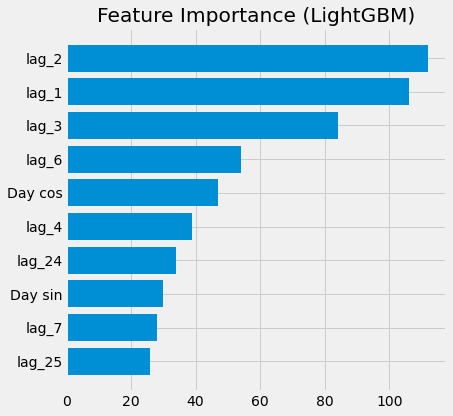

In [ ]:
#importance_LGBMR_10 = importance_LGBMR.sort_values(by='importance',ascending=False).head(10)

sorted_idx = np.argsort(importance_LGBMR_10.importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5

fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, importance_LGBMR_10.importance[sorted_idx], align="center")
plt.yticks(pos, importance_LGBMR_10.feature[sorted_idx])
plt.title("Feature Importance (LightGBM)")

fig.tight_layout()
plt.show()

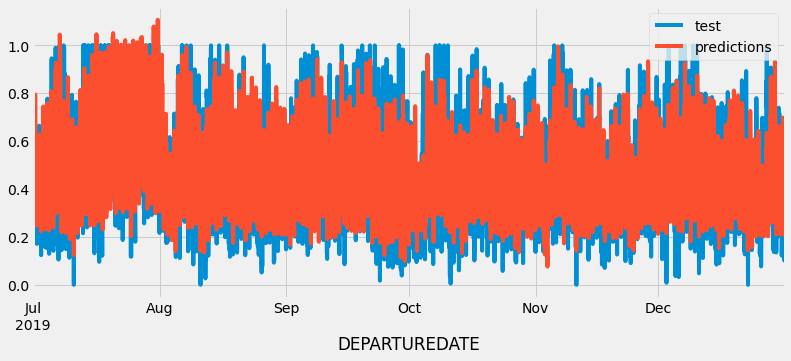

In [ ]:
# Plot of predictions
# ==============================================================================
fig, ax = plt.subplots(figsize=(12, 5))
data_test['OCCUPIED_SPACE_PERCENTAGE'].plot(ax=ax, label='test')
predictions_LGBM['pred'].plot(ax=ax, label='predictions')
ax.legend()
plt.savefig('Prediction_LGBMR_1.png');

In [ ]:
# Interactive plot of predictions
# ==============================================================================
data_plot = pd.DataFrame({
                'test': data_test['OCCUPIED_SPACE_PERCENTAGE'],
                'prediction': predictions_LGBM['pred']

                 })
data_plot.index.name = 'DEPARTUREDATE'

fig = px.line(
    data_frame = data_plot.reset_index(),
    x      = 'DEPARTUREDATE',
    y      = data_plot.columns,
    title  = 'Percentage of Consumed GDS',
    width  = 900,
    height = 500
)

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [ ]:
#data_test['OCCUPIED_SPACE_PERCENTAGE']

#data_test = data_test['2018-08-31 01:00:00' : '2019-12-31 23:00:00']
#data_test = data_test['2019-04-30 01:00:00' : '2019-12-31 23:00:00']

In [ ]:
data_test

OCCUPIED_SPACE_PERCENTAGE  IS_HOLIDAY  WINTER  SPRING  SUMMER  FALL  WORKINGDAY  Day sin  Day cos  M_1  ...  M_10  M_11  M_12  WD_1  WD_2  WD_3  WD_4  WD_5  WD_6  WD_7
DEPARTUREDATE                                                                                                                ...                                                            
2019-07-01 00:00:00                     0.1830         0.0     0.0     0.0     1.0   0.0         1.0    0.000    1.000    0  ...     0     0     0     1     0     0     0     0     0     0
2019-07-01 01:00:00                     0.3040         0.0     0.0     0.0     1.0   0.0         1.0    0.259    0.966    0  ...     0     0     0     1     0     0     0     0     0     0
2019-07-01 02:00:00                     0.3040         0.0     0.0     0.0     1.0   0.0         1.0    0.500    0.866    0  ...     0     0     0     1     0     0     0     0     0     0
2019-07-01 03:00:00                     0.2430         0.0     0.0     0.0     1.0   0.0         1.0    0.707    0.707    0  ...     0     0     0     1     0     0     0     0     0     0
2019-07-01 04:00:00                     0.5585         0.0     0.0     0.0     1.0   0.0         1.0    0.866    0.500    0  ...     0     0     0     1     0     0     0     0     0     0
...                                        ...         ...     ...     ...     ...   ...         ...      ...      ...  ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...
2019-12-31 19:00:00                     0.3000         0.0     1.0     0.0     0.0   0.0         1.0   -0.966    0.259    0  ...     0     0     1     0     1     0     0     0     0     0
2019-12-31 20:00:00                     0.2460         0.0     1.0     0.0     0.0   0.0         1.0   -0.866    0.500    0  ...     0     0     1     0     1     0     0     0     0     0
2019-12-31 21:00:00                     0.2250         0.0     1.0     0.0     0.0   0.0         1.0   -0.707    0.707    0  ...     0     0     1     0     1     0     0     0     0     0
2019-12-31 22:00:00                     0.1010         0.0     1.0     0.0     0.0   0.0         1.0   -0.500    0.866    0  ...     0     0     1     0     1     0     0     0     0     0
2019-12-31 23:00:00                     0.2510         0.0     1.0     0.0     0.0   0.0         1.0   -0.259    0.966    0  ...     0     0     1     0     1     0     0     0     0     0

[4416 rows x 28 columns]

In [ ]:
y_true = data_test['OCCUPIED_SPACE_PERCENTAGE']
y_pred_LGBMR = predictions_LGBM['pred']
y_true, y_pred_LGBMR

(DEPARTUREDATE
 2019-07-01 00:00:00    0.1830
 2019-07-01 01:00:00    0.3040
 2019-07-01 02:00:00    0.3040
 2019-07-01 03:00:00    0.2430
 2019-07-01 04:00:00    0.5585
                         ...  
 2019-12-31 19:00:00    0.3000
 2019-12-31 20:00:00    0.2460
 2019-12-31 21:00:00    0.2250
 2019-12-31 22:00:00    0.1010
 2019-12-31 23:00:00    0.2510
 Freq: H, Name: OCCUPIED_SPACE_PERCENTAGE, Length: 4416, dtype: float64,
 2019-07-01 00:00:00    0.290849
 2019-07-01 01:00:00    0.242796
 2019-07-01 02:00:00    0.362326
 2019-07-01 03:00:00    0.341011
 2019-07-01 04:00:00    0.434226
                          ...   
 2019-12-31 19:00:00    0.400321
 2019-12-31 20:00:00    0.347612
 2019-12-31 21:00:00    0.269624
 2019-12-31 22:00:00    0.205972
 2019-12-31 23:00:00    0.247843
 Freq: H, Name: pred, Length: 4416, dtype: float64)

In [ ]:
MAE_LGBMR = mean_absolute_error(y_true, y_pred_LGBMR)
print(f"Test error {MAE_LGBMR}")

Test error 0.10649149539312056


In [ ]:
                                                     ##CatBoost##

In [ ]:
# Create forecaster
# ==============================================================================
forecaster_CatBR = ForecasterAutoreg(
                regressor = CatBoostRegressor(random_state=123, silent=True),
                lags = 24
             )

forecaster_CatBR

ForecasterAutoreg 
Regressor: <catboost.core.CatBoostRegressor object at 0x0000018D4CD8A190> 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] 
Window size: 24 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: None 
Training index type: None 
Training index frequency: None 
Regressor parameters: {'loss_function': 'RMSE', 'silent': True, 'random_state': 123} 
Creation date: 2022-04-14 14:38:11 
Last fit date: None 
Skforecast version: 0.4.3 

In [ ]:
# Grid search of hyperparameters and lags
# ==============================================================================
# Regressor hyperparameters
param_grid = {
    'n_estimators': [100, 500],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1]
}

# Lags used as predictors
lags_grid = [24, 72, 168, 336, 672] #[72, [1, 2, 3, 23, 24, 25, 71, 72, 73]]

results_grid = grid_search_forecaster(
                        forecaster         = forecaster_CatBR,
                        y                  = data_encoded.loc[:end_validation, 'OCCUPIED_SPACE_PERCENTAGE'],
                        exog               = data_encoded.loc[:end_validation, exog_variables],
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = 24,
                        refit              = False,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(data_train)),
                        return_best        = True,
                        verbose            = False
                   )

Number of models compared: 60


loop param_grid:   8%|███                                  | 1/12 [00:08<01:31,  8.32s/it]

In [ ]:
# Results grid search
# ==============================================================================
results_grid.head(10)

In [ ]:
# Backtesting
# ==============================================================================
metric, predictions_CatBR = backtesting_forecaster(
    forecaster         = forecaster_CatBR,
    y                  = data_encoded['OCCUPIED_SPACE_PERCENTAGE'],
    exog               = data_encoded[exog_variables],
    initial_train_size = len(data_encoded.loc[:end_validation]),
    steps              = 24,
    refit              = False,
    metric             = 'mean_squared_error',
    verbose            = False
)

print(f"Backtest error: {metric}")

In [ ]:
# Feature importance
# ==============================================================================
importance_CatB = forecaster_CatBR.get_feature_importance()
importance_CatB
importance_CatB.sort_values(by='importance',ascending=False)

In [ ]:
importance_CatB = pd.DataFrame(data = importance_CatB)



importance_CatB_10 = importance_CatB.sort_values(by='importance',ascending=False).head(10)

importance_CatB_10.reset_index(inplace=True)

importance_CatB_10

In [ ]:
#importance_CatB_10 = importance_CatB.sort_values(by='importance',ascending=False).head(10)

sorted_idx = np.argsort(importance_CatB_10.importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5

fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, importance_CatB_10.importance[sorted_idx], align="center")
plt.yticks(pos, importance_CatB_10.feature[sorted_idx])
plt.title("Feature Importance (CatBoostRegressor)")

fig.tight_layout()
plt.show()

In [ ]:
predictions_CatBR

In [ ]:
# Plot of predictions
# ==============================================================================
fig, ax = plt.subplots(figsize=(12, 5))
data_test['OCCUPIED_SPACE_PERCENTAGE'].plot(ax=ax, label='test')
predictions_CatBR['pred'].plot(ax=ax, label='predictions')
ax.legend()
plt.savefig('Prediction_CatB_1.png');

In [ ]:
# Interactive plot of predictions
# ==============================================================================
data_plot = pd.DataFrame({
                'test': data_test['OCCUPIED_SPACE_PERCENTAGE'],
                'prediction': predictions_CatBR['pred']

                 })
data_plot.index.name = 'DEPARTUREDATE'

fig = px.line(
    data_frame = data_plot.reset_index(),
    x      = 'DEPARTUREDATE',
    y      = data_plot.columns,
    title  = 'Percentage of Consumed GDS',
    width  = 900,
    height = 500
)

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [ ]:
data_test

In [ ]:
data_test = data_test['2019-07-01 00:00:00' : '2019-12-31 23:00:00']
y_true = data_test['OCCUPIED_SPACE_PERCENTAGE']


In [ ]:
y_true

In [ ]:
#y_true = data_test['OCCUPIED_SPACE_PERCENTAGE']
y_pred_CatB = predictions_CatBR['pred']
y_true, y_pred_CatB

In [ ]:

MAE_CatB = mean_absolute_error(y_true, y_pred_CatB)
print(f"Test error (MAE_CatB) {MAE_CatB}")

In [ ]:
print(f"Test error (MAE_RF): {round(MAE_RF,3)}")
print(f"Test error (MAE_XGBR): {round(MAE_XGBR,3)}")
print(f"Test error (MAE_LGBMR): {round(MAE_LGBMR,3)}")
print(f"Test error (MAE_CatB): {round(MAE_CatB,3)}")

In [ ]:
predictions_LGBM.loc['2019-07-01 00:00:00' : '2019-07-01 23:00:00','pred']

In [ ]:
# Interactive plot of predictions
# ==============================================================================
data_plot = pd.DataFrame({
                'test': data_test.loc['2019-07-15 00:00:00' : '2019-07-15 23:00:00','OCCUPIED_SPACE_PERCENTAGE'],
                'prediction': predictions_LGBM.loc['2019-07-15 00:00:00' : '2019-07-15 23:00:00','pred']

                 })
data_plot.index.name = 'DEPARTUREDATE'

fig = px.line(
    data_frame = data_plot.reset_index(),
    x      = 'DEPARTUREDATE',
    y      = data_plot.columns,
    title  = 'Percentage of Consumed GDS',
    width  = 900,
    height = 500
)

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [ ]:
# Plot of predictions
# ==============================================================================
hours = mdates.HourLocator(interval = 1)
h_fmt = mdates.DateFormatter('%H:%M:%S')

fig, ax = plt.subplots(figsize=(15, 7))
data_test.loc['2019-07-15 00:00:00' : '2019-07-15 23:00:00','OCCUPIED_SPACE_PERCENTAGE'].plot(ax=ax, label='Real Values',x_compat=True)
predictions_LGBM.loc['2019-07-15 00:00:00' : '2019-07-15 23:00:00','pred'].plot(ax=ax, label='Predictions')

#Then tick and format with matplotlib:
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt)

fig.autofmt_xdate()

ax.legend()
plt.savefig('Prediction_CatB_24H.png')
plt.show()
;

In [ ]:
##ERROR COMPARISON

In [ ]:
error = {'Model': ['Random Forest', 'XGBRegressor', 'LGBMRegressor', 'CatBRegressor'], 'Error': [0.111, 0.108, 0.106, 0.105]}

In [ ]:
error = pd.DataFrame(error)
error
error['Error']

In [ ]:
xvalues = list(range(len(error)))
width = 0.30

plt.subplots(figsize=(7, 5))

pps = plt.bar(xvalues, error['Error'], width, color = 'r', edgecolor = 'k', linewidth = 1.5)
plt.xticks(xvalues, error['Model'], rotation = 45,fontsize = 10)
plt.xlabel('Models'); plt.ylabel('Error'); plt.title('Error Comparison')

for p in pps:
   height = p.get_height()
   plt.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show();

In [ ]:
#%%shell
#jupyter nbconvert --to notebook /content/drive/MyDrive/ColabNotebooks/Forecasting_with_RF_R1.ipynb

In [ ]:
                                    ##Forecasting models in PRODUCTION

In [ ]:
#data_val['OCCUPIED_SPACE_PERCENTAGE'].tail(24*30)

In [ ]:
#next_predictions = forecaster.predict(steps=24*3, last_window=data_val['OCCUPIED_SPACE_PERCENTAGE'].tail(24*30), exog = data_val[exog_variables])
#                                      #data_encoded['OCCUPIED_SPACE_PERCENTAGE'].tail(792), exog = data_encoded[exog_variables])

In [ ]:
#next_predictions

In [ ]:
#df.loc['2019-12-01 00:00:00' : '2019-12-01 23:00:00','OCCUPIED_SPACE_PERCENTAGE']

In [ ]:
## Plot of predictions
## ==============================================================================
#fig, ax = plt.subplots(figsize=(12, 5))
#df.loc['2019-07-01 00:00:00' : '2019-07-01 23:00:00','OCCUPIED_SPACE_PERCENTAGE'].plot(ax=ax, label='test')
#next_predictions['2019-07-01 00:00:00' : '2019-07-01 23:00:00',].plot(ax=ax, label='predictions')
#ax.legend()
#plt.savefig('Prediction_CatB.png');

In [ ]:
#next_predictions = forecaster.predict(steps=24*3, last_window=data_val['OCCUPIED_SPACE_PERCENTAGE'].tail(792), exog = data_val[exog_variables])

In [ ]:
## Plot of predictions
## ==============================================================================
#hours = mdates.HourLocator(interval = 1)
#h_fmt = mdates.DateFormatter('%H:%M:%S')
#
#fig, ax = plt.subplots(figsize=(15, 7))
#df.loc['2019-07-01 00:00:00' : '2019-07-01 23:00:00','OCCUPIED_SPACE_PERCENTAGE'].plot(ax=ax, label='Real Values',x_compat=True)
#next_predictions['2019-07-01 00:00:00' : '2019-07-01 23:00:00',].plot(ax=ax, label='Predictions')
#
##Then tick and format with matplotlib:
#ax.xaxis.set_major_locator(hours)
#ax.xaxis.set_major_formatter(h_fmt)
#
#fig.autofmt_xdate()
#
#ax.legend()
#plt.savefig('Prediction_CatB_24H.png')
#plt.show()
#
#;